#### Import Necessary Libraries

In [1]:
import random
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#!conda install -c districtdatalabs yellowbrick
#from yellowbrick.cluster import KElbowVisualizer

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#import necessary ArcGIS libraries
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode
### Open ArcGIS Credentials
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\arcgiscreds.json') as f:
    data = json.load(f)
    arcgis_creds = {'url':data['url'],'Username':data['Username'],'Password':data['Password']}

gis = GIS(arcgis_creds['url'], arcgis_creds['Username'], arcgis_creds['Password'])
get_geocoders(gis)

[<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">]

In [3]:
data_chi=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Chicago/chicago_data.csv')
data_chi=data_chi.drop(columns='Unnamed: 0').reset_index(drop=True)

data_sf=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/San Francisco/sanfran_data.csv')
data_sf=data_sf.drop(columns='Unnamed: 0').reset_index(drop=True)

data_tor=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Toronto/data_tor.csv')
data_tor=data_tor.drop(columns='Unnamed: 0').reset_index(drop=True)

data_manh=pd.read_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Cities/Manhattan/data_manh.csv')
data_manh=data_manh.drop(columns='Unnamed: 0').reset_index(drop=True)

### Data Formatting and Preprocessing

#### Load formatted city-geospatial data.

In [9]:
data_master=[data_chi,data_sf,data_tor,data_manh]
col_join=['Neighborhood','City','Latitude','Longitude']
data_mast=pd.DataFrame(columns={"Neighborhood","Borough","City","Latitude","Longitude"})

# Function to rename columns and add borough data to all dataframes in list df
for i in range(len(data_master)):
    df1=data_master[i]
    cols=df1.columns
    df1=df1.fillna(value=cols[0],axis='columns')
    data_mast=data_mast.append(df1)
    i = i + 1
    
data_mast=data_mast.reset_index(drop=True)    
data_mast

Latitude                       City   Longitude  \
0    41.878545          Chicago, Illinois  -87.647127   
1    41.870981          Chicago, Illinois  -87.629035   
2    41.882774          Chicago, Illinois  -87.620379   
3    41.899236          Chicago, Illinois  -87.629068   
4    41.894784          Chicago, Illinois  -87.624188   
5    41.943924          Chicago, Illinois  -87.647447   
6    41.899630          Chicago, Illinois  -87.672275   
7    41.950593          Chicago, Illinois  -87.659101   
8    41.979854          Chicago, Illinois  -87.667865   
9    41.874298          Chicago, Illinois  -87.620837   
10   41.927188          Chicago, Illinois  -87.653670   
11   41.899428          Chicago, Illinois  -87.684507   
12   41.906006          Chicago, Illinois  -87.627104   
13   41.851733          Chicago, Illinois  -87.635186   
14   41.911370          Chicago, Illinois  -87.639784   
15   41.728182          Chicago, Illinois  -87.596476   
16   41.823775          Chicago, Illinois  -87.602389   
17   41.908685          Chicago, Illinois  -87.679861   
18   41.929313          Chicago, Illinois  -87.798040   
19   41.881965          Chicago, Illinois  -87.679136   
20   41.808916          Chicago, Illinois  -87.596184   
21   41.836091          Chicago, Illinois  -87.633222   
22   41.914187          Chicago, Illinois  -87.792795   
23   41.809085          Chicago, Illinois  -87.632425   
24   41.829922          Chicago, Illinois  -87.672503   
25   42.007613          Chicago, Illinois  -87.813781   
26   41.921687          Chicago, Illinois  -87.678785   
27   41.792982          Chicago, Illinois  -87.724208   
28   41.856296          Chicago, Illinois  -87.623892   
29   41.924348          Chicago, Illinois  -87.734740   
30   41.744200          Chicago, Illinois  -87.586349   
31   41.794825          Chicago, Illinois  -87.593914   
32   41.792358          Chicago, Illinois  -87.617931   
33   41.812949          Chicago, Illinois  -87.617860   
34   41.778787          Chicago, Illinois  -87.601686   
35   41.835118          Chicago, Illinois  -87.618678   
36   41.988403          Chicago, Illinois  -87.662320   
37   41.947792          Chicago, Illinois  -87.683835   
38   41.899015          Chicago, Illinois  -87.641323   
39   41.810880          Chicago, Illinois  -87.726363   
40   41.795431          Chicago, Illinois  -87.696435   
41   41.836151          Chicago, Illinois  -87.648788   
42   41.781854          Chicago, Illinois  -87.579953   
43   41.729676          Chicago, Illinois  -87.572718   
44   42.009623          Chicago, Illinois  -87.670167   
45   41.938666          Chicago, Illinois  -87.711211   
46   41.863032          Chicago, Illinois  -87.616713   
47   41.706127          Chicago, Illinois  -87.598255   
48   41.923193          Chicago, Illinois  -87.707389   
49   41.817367          Chicago, Illinois  -87.698861   
50   41.867539          Chicago, Illinois  -87.667757   
51   41.972233          Chicago, Illinois  -87.690439   
52   41.968068          Chicago, Illinois  -87.721560   
53   41.771849          Chicago, Illinois  -87.695666   
54   41.893526          Chicago, Illinois  -87.617636   
55   41.983636          Chicago, Illinois  -87.723583   
56   41.769779          Chicago, Illinois  -87.726929   
57   41.740206          Chicago, Illinois  -87.615970   
58   41.717494          Chicago, Illinois  -87.648895   
59   42.001572          Chicago, Illinois  -87.695013   
60   41.848386          Chicago, Illinois  -87.674844   
61   41.927261          Chicago, Illinois  -87.765502   
62   41.882274          Chicago, Illinois  -87.658929   
63   41.978830          Chicago, Illinois  -87.771167   
64   41.761578          Chicago, Illinois  -87.572783   
65   41.878786          Chicago, Illinois  -87.715659   
66   41.713150          Chicago, Illinois  -87.675075   
67   41.860190          Chicago, Illinois  -87.717219   
68   41.779581          Chicago, Illinois  -87.768511   
69   41.900889  

In [10]:
##Run this code if there are issues with the column structure
#Reorganize Columns from joined tables
cols=data_mast.columns.tolist()
cols=[cols[4], cols[1], cols[3], cols[2], cols[0]]
data_mast=data_mast[cols]
data_mast

Neighborhood                       City  \
0                              Greektown          Chicago, Illinois   
1                           Printers Row          Chicago, Illinois   
2                         Millenium Park          Chicago, Illinois   
3                        Rush & Division          Chicago, Illinois   
4                       Magnificent Mile          Chicago, Illinois   
5                               Boystown          Chicago, Illinois   
6                           East Village          Chicago, Illinois   
7                           Wrigleyville          Chicago, Illinois   
8                          Andersonville          Chicago, Illinois   
9                             Grant Park          Chicago, Illinois   
10                    Sheffield & DePaul          Chicago, Illinois   
11                     Ukrainian Village          Chicago, Illinois   
12                            Gold Coast          Chicago, Illinois   
13                             Chinatown          Chicago, Illinois   
14                              Old Town          Chicago, Illinois   
15                              Burnside          Chicago, Illinois   
16                               Oakland          Chicago, Illinois   
17                           Wicker Park          Chicago, Illinois   
18                             Montclare          Chicago, Illinois   
19                         United Center          Chicago, Illinois   
20                               Kenwood          Chicago, Illinois   
21                         Armour Square          Chicago, Illinois   
22                              Galewood          Chicago, Illinois   
23                           Fuller Park          Chicago, Illinois   
24                         Mckinley Park          Chicago, Illinois   
25                           Edison Park          Chicago, Illinois   
26                              Bucktown          Chicago, Illinois   
27                           West Elsdon          Chicago, Illinois   
28                       Near South Side          Chicago, Illinois   
29                               Hermosa          Chicago, Illinois   
30                           Avalon Park          Chicago, Illinois   
31                             Hyde Park          Chicago, Illinois   
32                       Washington Park          Chicago, Illinois   
33                       Grand Boulevard          Chicago, Illinois   
34                              Woodlawn          Chicago, Illinois   
35                               Douglas          Chicago, Illinois   
36                             Edgewater          Chicago, Illinois   
37                          North Center          Chicago, Illinois   
38                           River North          Chicago, Illinois   
39                        Archer Heights          Chicago, Illinois   
40                             Gage Park          Chicago, Illinois   
41                            Bridgeport          Chicago, Illinois   
42                          Jackson Park          Chicago, Illinois   
43                       Calumet Heights          Chicago, Illinois   
44                           Rogers Park          Chicago, Illinois   
45                              Avondale          Chicago, Illinois   
46                         Museum Campus          Chicago, Illinois   
47                               Pullman          Chicago, Illinois   
48                          Logan Square          Chicago, Illinois   
49                         Brighton Park          Chicago, Illinois   
50                     Little Italy, UIC          Chicago, Illinois   
51                        Lincoln Square          Chicago, Illinois   
52                           Albany Park          Chicago, Illinois   
53                          Chicago Lawn          Chicago, Illinois   
54                         Streeterville          Chicago, Illinois   
55                            North Park          Ch

#### Trim City Data

In [11]:
#Fill NA city data for Manhattan
data_mast['City']=data_mast['City'].fillna('Manhattan, New York')
#Drop Borough Column
data_mast=data_mast.drop(columns='Borough')
#Print Head and Shape of dataframe
print(data_mast.shape)
data_mast.head()

(370, 4)


Neighborhood               City  Longitude   Latitude
0         Greektown  Chicago, Illinois -87.647127  41.878545
1      Printers Row  Chicago, Illinois -87.629035  41.870981
2    Millenium Park  Chicago, Illinois -87.620379  41.882774
3   Rush & Division  Chicago, Illinois -87.629068  41.899236
4  Magnificent Mile  Chicago, Illinois -87.624188  41.894784

#### Find Postal Codes with Reverese Geocoding (via arcGIS)

##### Function to send a reverse geocode API request

In [12]:
data_mast=data_mast.sort_values('Neighborhood').reset_index(drop=True)
def find_zip(names, longitudes, latitudes, distance=500):
    
    zips_list=[]
    for name, lng, lat in zip(names, longitudes, latitudes):
        print(name)
            
        results = reverse_geocode([lng, lat],distance)['address']['Postal']
                 
        zips_list.append([(
            name,
            lng, 
            lat, 
            results)])
               
    
    coord_zips = pd.DataFrame([item for zip_list in zips_list for item in zip_list])
    coord_zips.columns = ['Neighborhood', 
                        'Longitude', 
                        'Latitude',  
                        'Postal Code']

    return(coord_zips)

##### Call the Function

In [13]:
nbrhd_zips = find_zip(names=data_mast['Neighborhood'],
                                   longitudes=data_mast['Longitude'],
                                   latitudes=data_mast['Latitude'])

Agincourt North
Agincourt South-Malvern West
Alamo Square
Albany Park
Alderwood
Andersonville
Annex
Anza Vista
Archer Heights
Armour Square
Ashburn
Auburn Gresham
Austin
Avalon Park
Avondale
Balboa Terrace
Banbury-Don Mills
Bathurst Manor
Battery Park City
Bay Street Corridor
Bayview
Bayview Heights
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Belmont Cragin
Bendale
Bernal Heights
Beverly
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Boystown
Briar Hill-Belgravia
Bridgeport
Bridle Path-Sunnybrook-York Mills
Brighton Park
Broadview North
Brookhaven-Amesbury
Bucktown
Buena Vista Park/Ashbury Heights
Burnside
Cabbagetown-South St. James Town
Caledonia-Fairbank
Calumet Heights
Candlestick Point
Carnegie Hill
Casa Loma
Centennial Scarborough
Central Harlem
Central Richmond
Central Sunset
Central Waterfront/Dogpatch
Chatham
Chelsea
Chicago Lawn
Chinatown
Chinatown
Church-Yonge Corridor
Civic Center
Clairlea-Birchmount
Clanton Park
Clarendon Heights
Clear

##### Save Neighborhood Zips to avoid unnecessay API requests

In [14]:
# Save API geocode pull in order to avoid ArcGis token usage (One can use pickle in the above function, also)
nbrhd_zips.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/master_nbrhd_zip.csv')

##### Load Neighborhood Zips 

In [15]:
nbrhd_zips=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\master_nbrhd_zip.csv')

##### Merge Zip Data with City Data

Evaluate and format dataframes for merging

In [16]:
print(nbrhd_zips.shape)
print(data_mast.shape)
print(nbrhd_zips.sort_values('Neighborhood').head())
print(data_mast.sort_values('Neighborhood').reset_index(drop=True).head())

(370, 5)
(370, 4)
   Unnamed: 0                  Neighborhood   Longitude   Latitude Postal Code
0           0               Agincourt North  -79.266712  43.805441         M1S
1           1  Agincourt South-Malvern West  -79.265612  43.788658         M1S
2           2                  Alamo Square -122.434465  37.776566       94117
3           3                   Albany Park  -87.721560  41.968068       60625
4           4                     Alderwood  -79.541611  43.604937         M8W
                   Neighborhood                       City   Longitude  \
0               Agincourt North            Toronto, Canada  -79.266712   
1  Agincourt South-Malvern West            Toronto, Canada  -79.265612   
2                  Alamo Square  San Francisco, California -122.434465   
3                   Albany Park          Chicago, Illinois  -87.721560   
4                     Alderwood            Toronto, Canada  -79.541611   

    Latitude  
0  43.805441  
1  43.788658  
2  37.776566  
3  

In [ ]:
#Drop unnamed columns from csv import
nbrhd_zips=nbrhd_zips.drop(columns='Unnamed: 0')

In [24]:
#Merge Zipcode Dataframe with rest of master dataframe
data_master=pd.merge(data_mast.sort_values("Neighborhood").reset_index(drop=True),nbrhd_zips.drop(columns={'Neighborhood','Latitude','Longitude'}),left_index=True,right_index=True)
print(data_master.shape)
data_master.head()

(370, 5)


Neighborhood                       City   Longitude  \
0               Agincourt North            Toronto, Canada  -79.266712   
1  Agincourt South-Malvern West            Toronto, Canada  -79.265612   
2                  Alamo Square  San Francisco, California -122.434465   
3                   Albany Park          Chicago, Illinois  -87.721560   
4                     Alderwood            Toronto, Canada  -79.541611   

    Latitude Postal Code  
0  43.805441         M1S  
1  43.788658         M1S  
2  37.776566       94117  
3  41.968068       60625  
4  43.604937         M8W

##### Data Prep for API Request

Some neighborhood names are identical across cities. To avoid data inconsistency and processing issues encountered in the clustering phase, add the city name to the neighborhood to make location name more unique

##### Concat Cities for API call to avoid data mismatches with like Neighborhood names
(We can break these out later for better visability)

In [25]:
data_master['Neighborhood']=data_master['Neighborhood'].astype(str)+', '+data_master['City']

data_master.head()

Neighborhood                       City  \
0               Agincourt North, Toronto, Canada            Toronto, Canada   
1  Agincourt South-Malvern West, Toronto, Canada            Toronto, Canada   
2        Alamo Square, San Francisco, California  San Francisco, California   
3                 Albany Park, Chicago, Illinois          Chicago, Illinois   
4                     Alderwood, Toronto, Canada            Toronto, Canada   

    Longitude   Latitude Postal Code  
0  -79.266712  43.805441         M1S  
1  -79.265612  43.788658         M1S  
2 -122.434465  37.776566       94117  
3  -87.721560  41.968068       60625  
4  -79.541611  43.604937         M8W

##### Group Master Data by Cities for efficiency calling foursquare API

In [26]:
grouped = data_master.groupby(data_master.City)
sanfran_data = grouped.get_group("San Francisco, California").reset_index(drop=True)
manhattan_data=grouped.get_group("Manhattan, New York").reset_index(drop=True)
toronto_data=grouped.get_group("Toronto, Canada").reset_index(drop=True)
chicago_data=grouped.get_group("Chicago, Illinois").reset_index(drop=True)

## Pull Foursquare Data using Rest API

##### Open Foursquare Credentials

In [27]:
with open (r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\fsquarecreds.json') as f:
    data = json.load(f)
    fsquare_creds = {'CLIENT_ID':data['CLIENT_ID'],'CLIENT_SECRET':data['CLIENT_SECRET'],'VERSION':data['VERSION']}

##### Define function to get nearby venues based on Neighborhood Lat/Lng

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,limit=120):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            fsquare_creds['CLIENT_ID'], 
            fsquare_creds['CLIENT_SECRET'], 
            fsquare_creds['VERSION'], 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Apply above function to each city dataframe

In [29]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

sanfran_data_venues = getNearbyVenues(names=sanfran_data['Neighborhood'],
                                   latitudes=sanfran_data['Latitude'],
                                   longitudes=sanfran_data['Longitude'])

Alamo Square, San Francisco, California
Anza Vista, San Francisco, California
Balboa Terrace, San Francisco, California
Bayview, San Francisco, California
Bayview Heights, San Francisco, California
Bernal Heights, San Francisco, California
Buena Vista Park/Ashbury Heights, San Francisco, California
Candlestick Point, San Francisco, California
Central Richmond, San Francisco, California
Central Sunset, San Francisco, California
Central Waterfront/Dogpatch, San Francisco, California
Clarendon Heights, San Francisco, California
Cole Valley/Parnassus Heights, San Francisco, California
Corona Heights, San Francisco, California
Cow Hollow, San Francisco, California
Crocker Amazon, San Francisco, California
Diamond Heights, San Francisco, California
Downtown, San Francisco, California
Duboce Triangle, San Francisco, California
Eureka Valley / Dolores Heights, San Francisco, California
Excelsior, San Francisco, California
Financial District/Barbary Coast, San Francisco, California
Forest Hill,

In [30]:
chicago_data_venues = getNearbyVenues(names=chicago_data['Neighborhood'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude'])

Albany Park, Chicago, Illinois
Andersonville, Chicago, Illinois
Archer Heights, Chicago, Illinois
Armour Square, Chicago, Illinois
Ashburn, Chicago, Illinois
Auburn Gresham, Chicago, Illinois
Austin, Chicago, Illinois
Avalon Park, Chicago, Illinois
Avondale, Chicago, Illinois
Belmont Cragin, Chicago, Illinois
Beverly, Chicago, Illinois
Boystown, Chicago, Illinois
Bridgeport, Chicago, Illinois
Brighton Park, Chicago, Illinois
Bucktown, Chicago, Illinois
Burnside, Chicago, Illinois
Calumet Heights, Chicago, Illinois
Chatham, Chicago, Illinois
Chicago Lawn, Chicago, Illinois
Chinatown, Chicago, Illinois
Clearing, Chicago, Illinois
Douglas, Chicago, Illinois
Dunning, Chicago, Illinois
East Side, Chicago, Illinois
East Village, Chicago, Illinois
Edgewater, Chicago, Illinois
Edison Park, Chicago, Illinois
Englewood, Chicago, Illinois
Fuller Park, Chicago, Illinois
Gage Park, Chicago, Illinois
Galewood, Chicago, Illinois
Garfield Park, Chicago, Illinois
Garfield Ridge, Chicago, Illinois
Gold 

In [31]:
manhattan_data_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'])

Battery Park City, Manhattan, New York
Carnegie Hill, Manhattan, New York
Central Harlem, Manhattan, New York
Chelsea, Manhattan, New York
Chinatown, Manhattan, New York
Civic Center, Manhattan, New York
Clinton, Manhattan, New York
East Harlem, Manhattan, New York
East Village, Manhattan, New York
Financial District, Manhattan, New York
Flatiron, Manhattan, New York
Gramercy, Manhattan, New York
Greenwich Village, Manhattan, New York
Hamilton Heights, Manhattan, New York
Hudson Yards, Manhattan, New York
Inwood, Manhattan, New York
Lenox Hill, Manhattan, New York
Lincoln Square, Manhattan, New York
Little Italy, Manhattan, New York
Lower East Side, Manhattan, New York
Manhattan Valley, Manhattan, New York
Manhattanville, Manhattan, New York
Marble Hill, Manhattan, New York
Midtown, Manhattan, New York
Midtown South, Manhattan, New York
Morningside Heights, Manhattan, New York
Murray Hill, Manhattan, New York
Noho, Manhattan, New York
Roosevelt Island, Manhattan, New York
Soho, Manhatt

In [32]:
toronto_data_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

Agincourt North, Toronto, Canada
Agincourt South-Malvern West, Toronto, Canada
Alderwood, Toronto, Canada
Annex, Toronto, Canada
Banbury-Don Mills, Toronto, Canada
Bathurst Manor, Toronto, Canada
Bay Street Corridor, Toronto, Canada
Bayview Village, Toronto, Canada
Bayview Woods-Steeles, Toronto, Canada
Bedford Park-Nortown, Toronto, Canada
Beechborough-Greenbrook, Toronto, Canada
Bendale, Toronto, Canada
Birchcliffe-Cliffside, Toronto, Canada
Black Creek, Toronto, Canada
Blake-Jones, Toronto, Canada
Briar Hill-Belgravia, Toronto, Canada
Bridle Path-Sunnybrook-York Mills, Toronto, Canada
Broadview North, Toronto, Canada
Brookhaven-Amesbury, Toronto, Canada
Cabbagetown-South St. James Town, Toronto, Canada
Caledonia-Fairbank, Toronto, Canada
Casa Loma, Toronto, Canada
Centennial Scarborough, Toronto, Canada
Church-Yonge Corridor, Toronto, Canada
Clairlea-Birchmount, Toronto, Canada
Clanton Park, Toronto, Canada
Cliffcrest, Toronto, Canada
Corso Italia-Davenport, Toronto, Canada
Danforth

#### Save Venues to avoid unnecessary API Calls

In [33]:
sanfran_data_venues.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/sanfran_data_venues.csv',index=False)

chicago_data_venues.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/chicago_data_venues.csv',index=False)

toronto_data_venues.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/toronto_data_venues.csv',index=False)

manhattan_data_venues.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/manhattan_data_venues.csv',index=False)

#### Load Venues

In [34]:
sanfran_data_venues=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\sanfran_data_venues.csv')

chicago_data_venues=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\chicago_data_venues.csv')

toronto_data_venues=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\toronto_data_venues.csv')

manhattan_data_venues=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\manhattan_data_venues.csv')

##### Let's check how many venues were returned for each neighborhood. Let's also look at the number of unqiue venue categories

In [ ]:
##Number of Venues for each Neighborhood
print(sanfran_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(sanfran_data_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(sanfran_data_venues['Venue Category'].unique())))

In [ ]:
##Number of Venues for each Neighborhood
print(chicago_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(chicago_data_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(chicago_data_venues['Venue Category'].unique())))

In [ ]:
##Number of Venues for each Neighborhood
print(toronto_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(toronto_data_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(toronto_data_venues['Venue Category'].unique())))

In [ ]:
##Number of Venues for each Neighborhood
print(manhattan_data_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(manhattan_data_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(manhattan_data_venues['Venue Category'].unique())))

### Merge venue data back into one DataFrame

##### Double Check Dataframe structure before merging

In [35]:
print(toronto_data_venues.columns)
print(manhattan_data_venues.columns)
print(sanfran_data_venues.columns)
print(chicago_data_venues.columns)

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')
Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


 ### Structure city venue data into single dataframe

In [37]:
#Create Empty Dataframe with Neighborhood/Venue Information
master_venues=pd.DataFrame(columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

#Concatenate all venue data frames
master_venues_list=[sanfran_data_venues,chicago_data_venues,toronto_data_venues,manhattan_data_venues]
master_venues = pd.concat(master_venues_list)
master_venues.reset_index(inplace=True, drop=True)

##### Check Shape

In [39]:
print(master_venues.shape)

(22722, 7)


##### Check NA

In [40]:
print(master_venues.isnull().values.any())

False


##### View dataframe

In [41]:
master_venues.head()

Neighborhood  Neighborhood Latitude  \
0  Alamo Square, San Francisco, California              37.776566   
1  Alamo Square, San Francisco, California              37.776566   
2  Alamo Square, San Francisco, California              37.776566   
3  Alamo Square, San Francisco, California              37.776566   
4  Alamo Square, San Francisco, California              37.776566   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0             -122.434465           Alamo Square       37.776045   
1             -122.434465  Alamo Square Dog Park       37.775878   
2             -122.434465         Painted Ladies       37.776120   
3             -122.434465        The Independent       37.775573   
4             -122.434465               The Mill       37.776425   

   Venue Longitude Venue Category  
0      -122.434363           Park  
1      -122.435740        Dog Run  
2      -122.433389  Historic Site  
3      -122.437835      Rock Club  
4      -122.437970         Bakery

##### View descriptive statistics of master venue df

In [42]:
##Number of Venues for each Neighborhood
print(master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(master_venues['Venue Category'].unique())))

                                               Neighborhood Latitude  \
Neighborhood                                                           
Agincourt North, Toronto, Canada                                  45   
Agincourt South-Malvern West, Toronto, Canada                     39   
Alamo Square, San Francisco, California                          100   
Albany Park, Chicago, Illinois                                    78   
Alderwood, Toronto, Canada                                        24   

                                               Neighborhood Longitude  Venue  \
Neighborhood                                                                   
Agincourt North, Toronto, Canada                                   45     45   
Agincourt South-Malvern West, Toronto, Canada                      39     39   
Alamo Square, San Francisco, California                           100    100   
Albany Park, Chicago, Illinois                                     78     78   
Alderwood, Toro

### Obtain the Frequency of Venue Categories via One-Hot Encoding Techniques

First, get dummy variables for each instance of a category occurence with respect to a specific neighborhood (This will transform the dataframe, and venue categories will become the columns

In [43]:
#one hot encoding
data_master_onehot = pd.get_dummies(master_venues['Venue Category'], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = master_venues['Neighborhood'] 

#Move Neighborhood to first column
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
print(data_master_grouped.shape)
data_master_grouped.head()

(370, 517)


Neighborhood  ATM  Acai House  \
0               Agincourt North, Toronto, Canada  0.0         0.0   
1  Agincourt South-Malvern West, Toronto, Canada  0.0         0.0   
2        Alamo Square, San Francisco, California  0.0         0.0   
3                 Albany Park, Chicago, Illinois  0.0         0.0   
4                     Alderwood, Toronto, Canada  0.0         0.0   

   Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0           0.000000             0.0                0.0                 0.0   
1           0.000000             0.0                0.0                 0.0   
2           0.000000             0.0                0.0                 0.0   
3           0.012821             0.0                0.0                 0.0   
4           0.000000             0.0                0.0                 0.0   

   Airport  Airport Lounge  Airport Service  Airport Terminal  \
0      0.0             0.0              0.0               0.0   
1      0.0             0.0              0.0               0.0   
2      0.0             0.0              0.0               0.0   
3      0.0             0.0              0.0               0.0   
4      0.0             0.0              0.0               0.0   

   Alternative Healer  American Restaurant  Amphitheater  Animal Shelter  \
0                 0.0             0.000000           0.0             0.0   
1                 0.0             0.000000           0.0             0.0   
2                 0.0             0.010000           0.0             0.0   
3                 0.0             0.025641           0.0             0.0   
4                 0.0             0.000000           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0          0.00       0.0     0.0               0.0                     0.0   
1          0.00       0.0     0.0               0.0                     0.0   
2          0.01       0.0     0.0               0.0                     0.0   
3          0.00       0.0     0.0               0.0                     0.0   
4          0.00       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0          0.000000                 0.0         0.0                    0.0   
1          0.076923                 0.0         0.0                    0.0   
2          0.000000                 0.0         0.0                    0.0   
3          0.025641                 0.0         0.0                    0.0   
4          0.000000                 0.0         0.0                    0.0   

   Austrian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
0                  0.0              0.0          0.0              0.0   
1                  0.0              0.0          0.0              0.0   
2                  0.0              0.0          0.0              0.0   
3                  0.0              0.0          0.0              0.0   
4                  0.0              0.0          0.0              0.0   

   BBQ Joint  Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  \
0       0.00         0.0         0.000000        0.00  0.044444  0.044444   
1       0.00         0.0         0.025641        0.00  0.025641  0.025641   
2       0.02         0.0         0.000000        0.01  0.020000  0.000000   
3       0.00         0.0         0.000000        0.00  0.012821  0.012821   
4       0.00         0.0         0.000000        0.00  0.000000  0.000000   

    Bar  Base

#### Data Evaluation

In [44]:
avg_data_metrics=data_master_grouped.drop(columns="Neighborhood").mean().sort_values(ascending=False)
std_data_metrics=data_master_grouped.drop(columns="Neighborhood").std().sort_values(ascending=False)
avg_data_metrics=avg_data_metrics.reset_index().rename(columns={'index':'Venue Category',0:'Frequency_Avg'})
std_data_metrics=std_data_metrics.reset_index().rename(columns={'index':'Venue Category',0:'Frequency_Std'})

venue_metrics=pd.merge(avg_data_metrics,std_data_metrics,how='outer',on='Venue Category')
venue_metrics.sort_values('Frequency_Avg',ascending=False)

Venue Category  Frequency_Avg  Frequency_Std
0                                        Park       0.052220       0.072026
1                                 Coffee Shop       0.045085       0.037839
2                                 Pizza Place       0.032985       0.031252
3                               Grocery Store       0.024118       0.029649
4                                        Café       0.023941       0.025759
5                              Sandwich Place       0.022289       0.023414
6                                      Bakery       0.021158       0.021789
7                          Mexican Restaurant       0.019112       0.033759
8                          Italian Restaurant       0.017456       0.031172
9                          Chinese Restaurant       0.017327       0.035651
10                       Fast Food Restaurant       0.016733       0.032712
11                                        Bar       0.013626       0.021532
12                                       Bank       0.013535       0.023883
13                                   Pharmacy       0.013288       0.022044
14                        American Restaurant       0.013254       0.021894
15                                 Restaurant       0.011548       0.019945
16                                        Gym       0.011183       0.020849
17                          Convenience Store       0.011129       0.025669
18                             Ice Cream Shop       0.010762       0.018823
19                           Sushi Restaurant       0.009984       0.014576
20                       Gym / Fitness Center       0.009846       0.019032
21                             Discount Store       0.009774       0.022173
22                               Liquor Store       0.009611       0.018297
23                             Breakfast Spot       0.009349       0.016515
24                      Vietnamese Restaurant       0.009035       0.018381
25                                 Playground       0.008906       0.022561
26                               Burger Joint       0.008797       0.015549
27                        Japanese Restaurant       0.008788       0.015596
28                                      Trail       0.008127       0.024829
29                             Clothing Store       0.007956       0.024242
30                            Thai Restaurant       0.007815       0.013287
31                                Gas Station       0.007789       0.020730
32                          Indian Restaurant       0.007181       0.020939
33                         Seafood Restaurant       0.006808       0.013269
34                             Cosmetics Shop       0.006627       0.012773
35                        Fried Chicken Joint       0.006611       0.018867
36                           Asian Restaurant       0.006481       0.013814
37                               Intersection       0.006407       0.021187
38                                      Hotel       0.006233       0.015926
39                                Yoga Studio       0.006046       0.010007
40                              Deli / Bodega       0.006026       0.011761
41                                   Wine Bar       0.005783       0.016191
42                                 Donut Shop       0.005767       0.014006
43                                        Pub       0.005411       0.011588
44                                Supermarket       0.005296       0.013190
45                     Furniture / Home Store       0.005210       0.015915
46                               Cocktail Bar       0.005173       0.010850
47                                Bus Station       0.005120       0.014579
48                                      Diner       0.005095       0.012484
49                                  Pet Store       0.005015       0.011113
50                               Dessert Shop       0.004966       0.009631
51                                        Spa       0.004952       0.011521
52 

The above code shows the mean frequencies of each category. It helps visualize our dataset distribution, as well as highlights similar categories that can be grouped to increase the variation of categories

In [45]:
data_master_grouped.describe()

ATM  Acai House  Accessories Store  Adult Boutique  \
count  370.000000  370.000000         370.000000      370.000000   
mean     0.000335    0.000027           0.001394        0.000135   
std      0.003637    0.000520           0.005320        0.001156   
min      0.000000    0.000000           0.000000        0.000000   
25%      0.000000    0.000000           0.000000        0.000000   
50%      0.000000    0.000000           0.000000        0.000000   
75%      0.000000    0.000000           0.000000        0.000000   
max      0.055556    0.010000           0.066667        0.010000   

       Afghan Restaurant  African Restaurant     Airport  Airport Lounge  \
count         370.000000          370.000000  370.000000      370.000000   
mean            0.000158            0.000469    0.000163        0.000360   
std             0.001671            0.003091    0.002228        0.006124   
min             0.000000            0.000000    0.000000        0.000000   
25%             0.000000            0.000000    0.000000        0.000000   
50%             0.000000            0.000000    0.000000        0.000000   
75%             0.000000            0.000000    0.000000        0.000000   
max             0.026316            0.040000    0.033333        0.116667   

       Airport Service  Airport Terminal  Alternative Healer  \
count       370.000000        370.000000          370.000000   
mean          0.000180          0.000163            0.000166   
std           0.003466          0.002228            0.001511   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          0.000000            0.000000   
75%           0.000000          0.000000            0.000000   
max           0.066667          0.033333            0.021277   

       American Restaurant  Amphitheater  Animal Shelter  Antique Shop  \
count           370.000000    370.000000      370.000000    370.000000   
mean              0.013254      0.000198        0.000082      0.000596   
std               0.021894      0.002014        0.000911      0.003102   
min               0.000000      0.000000        0.000000      0.000000   
25%               0.000000      0.000000        0.000000      0.000000   
50%               0.000000      0.000000        0.000000      0.000000   
75%               0.020000      0.000000        0.000000      0.000000   
max               0.166667      0.033333        0.010417      0.030000   

         Aquarium      Arcade  Arepa Restaurant  Argentinian Restaurant  \
count  370.000000  370.000000        370.000000              370.000000   
mean     0.000270    0.000236          0.000162                0.000581   
std      0.004284    0.001788          0.001265                0.002755   
min      0.000000    0.000000          0.000000                0.000000   
25%      0.000000    0.000000          0.000000                0.000000   
50%      0.000000    0.000000          0.000000                0.000000   
75%      0.000000    0.000000          0.000000                0.000000   
max      0.080000    0.019231          0.010000                0.025000   

       Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
count   370.000000  370.000000           370.000000            370.000000   
mean      0.004450    0.001139             0.002362              0.000027   
std       0.012211    0.004251             0.005708              0.000520   
min       0.000000    0.000000             0.000000              0.000000   
25%       0.000000    0.000000             0.000000              0.000000   
50%       0.000000    0.000000             0.000000              0.000000   
75%       0.000000    0.000000             0.000000              0.000000   
max       0.142857    0.030000             0.037037              0.010000   

       Asian Restaurant  Athletics & Sports  Auditorium  \
count        370.000000          370.000000

After review of the data, there are a set of categories that can be reduced to improve accuracy of the **KMeans Recommendation Engine.** Cafe and Coffee Shops, two arguably synonymous categories, account for a high average of the frequency. Let's bundle these two values. I do not frequent dessert shops enough to have a separate opinion for Ice Cream and Frozen Yogurt, so I've bundled these as well. Lastly, all categories related to Airport services are grouped under one feature: 'Airport'.

In [46]:
master_venues=master_venues.replace({'Venue Category': {'Coffee Shop':'Coffee Shop / Café','Café':'Coffee Shop / Café','Ice Cream Shop':'Ice Cream / FroYo','Frozen Yogurt Shop':'Ice Cream / FroYo','Gym':'Gym / Fitness Center','Airport Lounge':'Airport','Airport Service':'Airport','Airport Terminal':'Airport'}})
master_venues.head()

Neighborhood  Neighborhood Latitude  \
0  Alamo Square, San Francisco, California              37.776566   
1  Alamo Square, San Francisco, California              37.776566   
2  Alamo Square, San Francisco, California              37.776566   
3  Alamo Square, San Francisco, California              37.776566   
4  Alamo Square, San Francisco, California              37.776566   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0             -122.434465           Alamo Square       37.776045   
1             -122.434465  Alamo Square Dog Park       37.775878   
2             -122.434465         Painted Ladies       37.776120   
3             -122.434465        The Independent       37.775573   
4             -122.434465               The Mill       37.776425   

   Venue Longitude Venue Category  
0      -122.434363           Park  
1      -122.435740        Dog Run  
2      -122.433389  Historic Site  
3      -122.437835      Rock Club  
4      -122.437970         Bakery

#### After obtaining the formatted venue data, reapply the onehot coding techniques to the updated Dataframe

In [47]:
##Number of Venues for each Neighborhood
print(master_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(master_venues['Neighborhood'].unique())))

##Number of Unique Categoriges
print('There are {} unique categories.'.format(len(master_venues['Venue Category'].unique())))

 

### Obtain the Frequency of Venue Categories via One-Hot Encoding Techniques

#one hot encoding
data_master_onehot = pd.get_dummies(master_venues['Venue Category'], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
data_master_onehot['Neighborhood'] = master_venues['Neighborhood'] 

                                               Neighborhood Latitude  \
Neighborhood                                                           
Agincourt North, Toronto, Canada                                  45   
Agincourt South-Malvern West, Toronto, Canada                     39   
Alamo Square, San Francisco, California                          100   
Albany Park, Chicago, Illinois                                    78   
Alderwood, Toronto, Canada                                        24   

                                               Neighborhood Longitude  Venue  \
Neighborhood                                                                   
Agincourt North, Toronto, Canada                                   45     45   
Agincourt South-Malvern West, Toronto, Canada                      39     39   
Alamo Square, San Francisco, California                           100    100   
Albany Park, Chicago, Illinois                                     78     78   
Alderwood, Toro

**Normalize the data to reduce clustering inefficiencies.** (Mean is used due to the nature of onehot encoding. By obtaining the mean of the onehot data, a frequency of venue categories is returned)

In [48]:
#Move Neighborhood to first column
data_master_grouped = data_master_onehot.groupby('Neighborhood').mean().reset_index()
print(data_master_grouped.shape)
data_master_grouped.head(10)

(370, 511)


Neighborhood  ATM  Acai House  \
0               Agincourt North, Toronto, Canada  0.0         0.0   
1  Agincourt South-Malvern West, Toronto, Canada  0.0         0.0   
2        Alamo Square, San Francisco, California  0.0         0.0   
3                 Albany Park, Chicago, Illinois  0.0         0.0   
4                     Alderwood, Toronto, Canada  0.0         0.0   
5               Andersonville, Chicago, Illinois  0.0         0.0   
6                         Annex, Toronto, Canada  0.0         0.0   
7          Anza Vista, San Francisco, California  0.0         0.0   
8              Archer Heights, Chicago, Illinois  0.0         0.0   
9               Armour Square, Chicago, Illinois  0.0         0.0   

   Accessories Store  Adult Boutique  Afghan Restaurant  African Restaurant  \
0           0.000000             0.0                0.0                 0.0   
1           0.000000             0.0                0.0                 0.0   
2           0.000000             0.0                0.0                 0.0   
3           0.012821             0.0                0.0                 0.0   
4           0.000000             0.0                0.0                 0.0   
5           0.000000             0.0                0.0                 0.0   
6           0.000000             0.0                0.0                 0.0   
7           0.000000             0.0                0.0                 0.0   
8           0.000000             0.0                0.0                 0.0   
9           0.000000             0.0                0.0                 0.0   

   Airport  Alternative Healer  American Restaurant  Amphitheater  \
0      0.0                 0.0             0.000000           0.0   
1      0.0                 0.0             0.000000           0.0   
2      0.0                 0.0             0.010000           0.0   
3      0.0                 0.0             0.025641           0.0   
4      0.0                 0.0             0.000000           0.0   
5      0.0                 0.0             0.010000           0.0   
6      0.0                 0.0             0.000000           0.0   
7      0.0                 0.0             0.030000           0.0   
8      0.0                 0.0             0.000000           0.0   
9      0.0                 0.0             0.038462           0.0   

   Animal Shelter  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0             0.0          0.00       0.0     0.0               0.0   
1             0.0          0.00       0.0     0.0               0.0   
2             0.0          0.01       0.0     0.0               0.0   
3             0.0          0.00       0.0     0.0               0.0   
4             0.0          0.00       0.0     0.0               0.0   
5             0.0          0.01       0.0     0.0               0.0   
6             0.0          0.00       0.0     0.0               0.0   
7             0.0          0.01       0.0     0.0               0.0   
8             0.0          0.00       0.0     0.0               0.0   
9             0.0          0.00       0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0          0.0         0.0              0.00000   
1                     0.0          0.0         0.0              0.00000   
2                     0.0          0.0         0.0              0.00000   
3                     0.0          0.0         0.0              0.00000   
4                     0.0          0.0         0.0              0.00000   
5                     0.0          0.0         0.0              0.00000   
6                     0.0          0.0         0.0              0.01000   
7                     0.0          0.0         0.0              0.01000   
8                     0.0          0.0         0.0              0.03125   
9                     0.0          0.0         0.0              0.00000   

   Arts & Entertainment  Asian Restaur

#### Data Evaluation - Round 2
(Revaluate the data after converting values to feature (v category) frequencies)

In [49]:
avg_data_metrics=data_master_grouped.drop(columns="Neighborhood").mean().sort_values(ascending=False)
std_data_metrics=data_master_grouped.drop(columns="Neighborhood").std().sort_values(ascending=False)
avg_data_metrics=avg_data_metrics.reset_index().rename(columns={'index':'Venue Category',0:'Frequency_Avg'})
std_data_metrics=std_data_metrics.reset_index().rename(columns={'index':'Venue Category',0:'Frequency_Std'})

venue_metrics=pd.merge(avg_data_metrics,std_data_metrics,how='outer',on='Venue Category')
venue_metrics.sort_values('Frequency_Avg',ascending=False)

Venue Category  Frequency_Avg  Frequency_Std
0                          Coffee Shop / Café       0.069026       0.049743
1                                        Park       0.052220       0.072026
2                                 Pizza Place       0.032985       0.031252
3                               Grocery Store       0.024118       0.029649
4                              Sandwich Place       0.022289       0.023414
5                                      Bakery       0.021158       0.021789
6                        Gym / Fitness Center       0.021029       0.029222
7                          Mexican Restaurant       0.019112       0.033759
8                          Italian Restaurant       0.017456       0.031172
9                          Chinese Restaurant       0.017327       0.035651
10                       Fast Food Restaurant       0.016733       0.032712
11                                        Bar       0.013626       0.021532
12                                       Bank       0.013535       0.023883
13                                   Pharmacy       0.013288       0.022044
14                        American Restaurant       0.013254       0.021894
15                          Ice Cream / FroYo       0.012073       0.019448
16                                 Restaurant       0.011548       0.019945
17                          Convenience Store       0.011129       0.025669
18                           Sushi Restaurant       0.009984       0.014576
19                             Discount Store       0.009774       0.022173
20                               Liquor Store       0.009611       0.018297
21                             Breakfast Spot       0.009349       0.016515
22                      Vietnamese Restaurant       0.009035       0.018381
23                                 Playground       0.008906       0.022561
24                               Burger Joint       0.008797       0.015549
25                        Japanese Restaurant       0.008788       0.015596
26                                      Trail       0.008127       0.024829
27                             Clothing Store       0.007956       0.024242
28                            Thai Restaurant       0.007815       0.013287
29                                Gas Station       0.007789       0.020730
30                          Indian Restaurant       0.007181       0.020939
31                         Seafood Restaurant       0.006808       0.013269
32                             Cosmetics Shop       0.006627       0.012773
33                        Fried Chicken Joint       0.006611       0.018867
34                           Asian Restaurant       0.006481       0.013814
35                               Intersection       0.006407       0.021187
36                                      Hotel       0.006233       0.015926
37                                Yoga Studio       0.006046       0.010007
38                              Deli / Bodega       0.006026       0.011761
39                                   Wine Bar       0.005783       0.016191
40                                 Donut Shop       0.005767       0.014006
41                                        Pub       0.005411       0.011588
42                                Supermarket       0.005296       0.013190
43                     Furniture / Home Store       0.005210       0.015915
44                               Cocktail Bar       0.005173       0.010850
45                                Bus Station       0.005120       0.014579
46                                      Diner       0.005095       0.012484
47                                  Pet Store       0.005015       0.011113
48                               Dessert Shop       0.004966       0.009631
49                                        Spa       0.004952       0.011521
50                              Train Station       0.004867       0.017936
51                                  Bookstore       0.004739       0.010830
52 

Text(0, 0.5, 'Frequency_Avg')

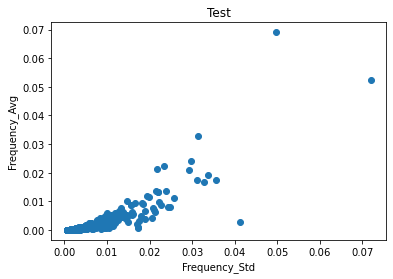

In [50]:
x=venue_metrics['Frequency_Std']
y=venue_metrics['Frequency_Avg']
plt.scatter(x,y)

plt.title("Test")
plt.xlabel("Frequency_Std")
plt.ylabel("Frequency_Avg")


#### The scatter plot above indiciates that a majority of the venue categories have a Coefficient of Variation = 1 , where CoV = Sigma / Mean. This indicates the dataset is concentrated about a single value. 

### After wrangling and formatting the data, the next step is to determing the most common venues

##### Function to return most common venues

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

##### Grab the top 10 venues and create columns according to number of top venues

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

['Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

##### Create a new dataframe

In [54]:
master_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
master_neighborhoods_venues_sorted['Neighborhood'] = data_master_grouped['Neighborhood']

##### add common venues into new dataframe

In [55]:
for ind in np.arange(data_master_grouped.shape[0]):
    master_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_master_grouped.iloc[ind, :], num_top_venues)

master_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0               Agincourt North, Toronto, Canada    Chinese Restaurant   
1  Agincourt South-Malvern West, Toronto, Canada    Chinese Restaurant   
2        Alamo Square, San Francisco, California    Coffee Shop / Café   
3                 Albany Park, Chicago, Illinois    Mexican Restaurant   
4                     Alderwood, Toronto, Canada           Gas Station   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Indian Restaurant     Ice Cream / FroYo        Sandwich Place   
1         Shopping Mall      Asian Restaurant  Cantonese Restaurant   
2     Ice Cream / FroYo      Sushi Restaurant       Bubble Tea Shop   
3           Pizza Place        Discount Store            Hookah Bar   
4        Discount Store     Convenience Store                  Park   

  5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
0                Bakery                      Bank              Pharmacy   
1      Malay Restaurant      Hong Kong Restaurant       Badminton Court   
2                  Park  Mediterranean Restaurant    Italian Restaurant   
3            Donut Shop         Mobile Phone Shop     Korean Restaurant   
4           Pizza Place                  Pharmacy                 Hotel   

  8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
0        Discount Store  Vietnamese Restaurant     Coffee Shop / Café  
1                Bakery                   Bank     Seafood Restaurant  
2          Cocktail Bar           Liquor Store               Dive Bar  
3    Chinese Restaurant                   Park         Sandwich Place  
4      Storage Facility          Grocery Store           Intersection

# K-Means Clustering
Cluster the all city-venue data under one dataframe. This step is necessary to produce a functioning Kmeans prediction, and consequently, a recommendation engine. 


In [56]:
#import Necessary Packages
from scipy.spatial.distance import cdist

##### Preprocessing (Clustering Data)

In [57]:
# Remove column 'Neighborhood' from grouped data
data_master_grouped_clustering = data_master_grouped.drop('Neighborhood', 1)
print(data_master_grouped_clustering.shape)
data_master_grouped_clustering.head()

(370, 510)


ATM  Acai House  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  0.0         0.0           0.000000             0.0                0.0   
1  0.0         0.0           0.000000             0.0                0.0   
2  0.0         0.0           0.000000             0.0                0.0   
3  0.0         0.0           0.012821             0.0                0.0   
4  0.0         0.0           0.000000             0.0                0.0   

   African Restaurant  Airport  Alternative Healer  American Restaurant  \
0                 0.0      0.0                 0.0             0.000000   
1                 0.0      0.0                 0.0             0.000000   
2                 0.0      0.0                 0.0             0.010000   
3                 0.0      0.0                 0.0             0.025641   
4                 0.0      0.0                 0.0             0.000000   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0           0.0             0.0          0.00       0.0     0.0   
1           0.0             0.0          0.00       0.0     0.0   
2           0.0             0.0          0.01       0.0     0.0   
3           0.0             0.0          0.00       0.0     0.0   
4           0.0             0.0          0.00       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                  0.0                   0.0          0.000000   
1                  0.0                   0.0          0.076923   
2                  0.0                   0.0          0.000000   
3                  0.0                   0.0          0.025641   
4                  0.0                   0.0          0.000000   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                 0.0         0.0                    0.0                  0.0   
1                 0.0         0.0                    0.0                  0.0   
2                 0.0         0.0                    0.0                  0.0   
3                 0.0         0.0                    0.0                  0.0   
4                 0.0         0.0                    0.0                  0.0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0              0.0          0.0              0.0       0.00         0.0   
1              0.0          0.0              0.0       0.00         0.0   
2              0.0          0.0              0.0       0.02         0.0   
3              0.0          0.0              0.0       0.00         0.0   
4              0.0          0.0              0.0       0.00         0.0   

   Badminton Court  Bagel Shop    Bakery      Bank   Bar  Baseball Field  \
0         0.000000        0.00  0.044444  0.044444  0.00             0.0   
1         0.025641        0.00  0.025641  0.025641  0.00             0.0   
2         0.000000        0.01  0.020000  0.000000  0.02             0.0   
3         0.000000        0.00  0.012821  0.012821  0.00             0.0   
4         0.000000        0.00  0.000000  0.000000  0.00             0.0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  Beach  \
0               0.0               0.0                 0.0         0.0    0.0   
1               0.0               0.0                 0.0         0.0    0.0   
2               0.0               0.0                 0.0         0.0    0.0   
3               0.0               0.0                 0.0         0.0    0.0   
4               0.0               0.0                 0.0         0

### Check for Optimal K (elbow Method)

##### Elbow Method (Inertia) function

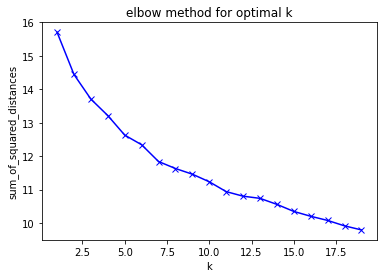

In [58]:

sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(data_master_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

##### Elbow Method (Distortions) function

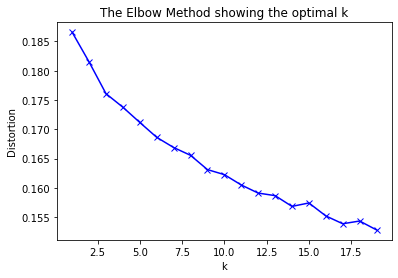

In [59]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_master_grouped_clustering)
    kmeanModel.fit(data_master_grouped_clustering)
    distortions.append(sum(np.min(cdist(data_master_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_master_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### The "Bend" in the elbow method looks to be between 13 and 16. Set the number of clusters in this range

In [60]:
# set number of clusters
kclusters = 14
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=5).fit(data_master_grouped_clustering)

In [61]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([ 3, 12, 10, 11,  4, 10,  9, 10, 11,  3,  4,  4,  4,  4, 10, 10,  9,
        2, 10,  9,  3,  4,  0,  2,  3,  4, 11,  2, 10,  4])

##### Insert Cluster Labels (Numeric) into Top 10 Venue by Neighborhood Df

In [62]:
master_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
master_neighborhoods_venues_sorted.head()

Cluster Labels                                   Neighborhood  \
0               3               Agincourt North, Toronto, Canada   
1              12  Agincourt South-Malvern West, Toronto, Canada   
2              10        Alamo Square, San Francisco, California   
3              11                 Albany Park, Chicago, Illinois   
4               4                     Alderwood, Toronto, Canada   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Chinese Restaurant     Indian Restaurant     Ice Cream / FroYo   
1    Chinese Restaurant         Shopping Mall      Asian Restaurant   
2    Coffee Shop / Café     Ice Cream / FroYo      Sushi Restaurant   
3    Mexican Restaurant           Pizza Place        Discount Store   
4           Gas Station        Discount Store     Convenience Store   

  4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
0        Sandwich Place                Bakery                      Bank   
1  Cantonese Restaurant      Malay Restaurant      Hong Kong Restaurant   
2       Bubble Tea Shop                  Park  Mediterranean Restaurant   
3            Hookah Bar            Donut Shop         Mobile Phone Shop   
4                  Park           Pizza Place                  Pharmacy   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0              Pharmacy        Discount Store  Vietnamese Restaurant   
1       Badminton Court                Bakery                   Bank   
2    Italian Restaurant          Cocktail Bar           Liquor Store   
3     Korean Restaurant    Chinese Restaurant                   Park   
4                 Hotel      Storage Facility          Grocery Store   

  10th Most Common Venue  
0     Coffee Shop / Café  
1     Seafood Restaurant  
2               Dive Bar  
3         Sandwich Place  
4           Intersection

In [63]:
##Run Data Master Grouped CLustering to confirm correct clusters
data_master_grouped.head(1)

Neighborhood  ATM  Acai House  Accessories Store  \
0  Agincourt North, Toronto, Canada  0.0         0.0                0.0   

   Adult Boutique  Afghan Restaurant  African Restaurant  Airport  \
0             0.0                0.0                 0.0      0.0   

   Alternative Healer  American Restaurant  Amphitheater  Animal Shelter  \
0                 0.0                  0.0           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0                 0.0         0.0                    0.0   

   Austrian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
0                  0.0              0.0          0.0              0.0   

   BBQ Joint  Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  \
0        0.0         0.0              0.0         0.0  0.044444  0.044444   

   Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.0             0.0               0.0               0.0   

   Basketball Stadium  Bath House  Beach  Beach Bar  Bed & Breakfast  \
0                 0.0         0.0    0.0        0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
0       0.0          0.0    0.022222                 0.0            0.0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                       0.0        0.0         0.0     0.0         0.0   

   Boat or Ferry  Bookstore  Botanical Garden  Boutique  Bowling Alley  \
0            0.0        0.0               0.0       0.0            0.0   

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0         0.0                   0.0             0.0      0.0          0.0   

   Bridge  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0     0.0         0.022222     0.0       0.0           0.0   

   Burmese Restaurant  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0                 0.0            0.0       0.0          0.0       0.0   

   Business Service  Butcher  Cafeteria  Cajun / Creole Restaurant  \
0          0.022222      0.0        0.0                        0.0   

   Cambodian Restaurant  Camera Store  Campground  Candy Store  \
0                   0.0           0.0         0.0          0.0   

   Cantonese Restaurant  Caribbean Restaurant  Carpet Store  Casino  Castle  \
0                   0.0                   0.0           0.0     0.0     0.0   

   Cemetery  Cha Chaan Teng  Check Cashing Service  Cheese Shop  \
0       0.0             0.0                    0.0          0.0   

   Chinese Restaurant  Chiropractor  Chocolate Shop  Church  Churrascaria  \
0            0.088889           0.0             0.0     0.0           0.0   

   Circus  Climbing Gym  Clothing Store  Club House  Cocktail Bar  \
0     0.0           0.0        0.022222         0.0           0.0   

   Coffee Shop / Café  College Arts Building  College Bookstore  \
0            0.044444                    0.0                0.0   

   College Cafeteria  College Gym  College Quad  College Rec Center  \
0                0.0          0.0           0.0                 0.0   

   College Stadium  College Theater  Comedy Club  Comfort Food Restaurant  \
0              0.0              0.0          0.0                      0.0   

   Comic Shop  Community Center  Concert Hall  Construction & Landscaping  \
0         0.0               0.0           0.0                         0.0   

   Convenience Store  Cooking School  Cosmetics Shop  Coworking Space  \
0           0.022222             0.0             0.0              0.0   

   Creperie  Cuban Restaurant  Cultural Center  Cupcake Shop  Curling Ic

##### Merge clustered venue data with master data to add latitude/longitude for each neighborhood. Remove unnecessary features for efficiency and recommendation accuracy

In [65]:
data_master_merged = data_master
data_master_merged = data_master_merged.join(master_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#List columns for column reorganization (see code below)
print(data_master_merged.columns)

Index(['Neighborhood', 'City', 'Longitude', 'Latitude', 'Postal Code',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')


In [66]:
### Arrange Columns in correct order and call a new Dataframe
#Remove Postal Code and City
master_cols=data_master_merged.columns[[0,1,2,3]+list(range(5,data_master_merged.shape[1]))]
master_venues_merged=data_master_merged[master_cols]

#Check Shape of Dataframe and inspect head 
print(master_venues_merged.shape)
master_venues_merged.head(3)

(370, 15)


Neighborhood                       City  \
0               Agincourt North, Toronto, Canada            Toronto, Canada   
1  Agincourt South-Malvern West, Toronto, Canada            Toronto, Canada   
2        Alamo Square, San Francisco, California  San Francisco, California   

    Longitude   Latitude  Cluster Labels 1st Most Common Venue  \
0  -79.266712  43.805441               3    Chinese Restaurant   
1  -79.265612  43.788658              12    Chinese Restaurant   
2 -122.434465  37.776566              10    Coffee Shop / Café   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Indian Restaurant     Ice Cream / FroYo        Sandwich Place   
1         Shopping Mall      Asian Restaurant  Cantonese Restaurant   
2     Ice Cream / FroYo      Sushi Restaurant       Bubble Tea Shop   

  5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
0                Bakery                      Bank              Pharmacy   
1      Malay Restaurant      Hong Kong Restaurant       Badminton Court   
2                  Park  Mediterranean Restaurant    Italian Restaurant   

  8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
0        Discount Store  Vietnamese Restaurant     Coffee Shop / Café  
1                Bakery                   Bank     Seafood Restaurant  
2          Cocktail Bar           Liquor Store               Dive Bar

##### Check DataFrame Shapes (Make sure the rows (Neighborhoods) are equal from both dataframes)

In [67]:
#Make Sure array is dataframe
master_venues_merged=pd.DataFrame(master_venues_merged)

#List Cluster Labels as type integer. Check Dataframe Shape
data_master_merged['Cluster Labels']=data_master_merged['Cluster Labels'].astype(int)
print(data_master_merged.shape)

#List Cluster Labels as type integer. Check Dataframe Shape
master_venues_merged['Cluster Labels']=master_venues_merged['Cluster Labels'].astype(int)
print(master_venues_merged.shape)

(370, 16)
(370, 15)


### Map Neighborhood Clusters using Folium

In [68]:
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode('San Francisco, California')
latitude = location.latitude
longitude = location.longitude
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(master_venues_merged['Latitude'], master_venues_merged['Longitude'], master_venues_merged['Neighborhood'], master_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' : Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Observe Neighborhood-Venue data for each Cluster 

In [69]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 0, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
23           Bayview Woods-Steeles, Toronto, Canada               0   
34            Briar Hill-Belgravia, Toronto, Canada               0   
94             Englemount-Lawrence, Toronto, Canada               0   
164  Kingsview Village-The Westway, Toronto, Canada               0   
197                     Maple Leaf, Toronto, Canada               0   
200                  Markland Wood, Toronto, Canada               0   
217                    Morningside, Toronto, Canada               0   
221                   Mount Dennis, Toronto, Canada               0   
261              Parkwoods-Donalda, Toronto, Canada               0   
265                  Pleasant View, Toronto, Canada               0   
275                Rexdale-Kipling, Toronto, Canada               0   
278              Rockcliffe-Smythe, Toronto, Canada               0   
285   Runnymede-Bloor West Village, Toronto, Canada               0   
291            Scarborough Village, Toronto, Canada               0   
331               Victoria Village, Toronto, Canada               0   
358                         Woburn, Toronto, Canada               0   
361                     Woodlawn, Chicago, Illinois               0   

      1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
23                     Park                  Bank      Coffee Shop / Café   
34       Coffee Shop / Café                  Park  Furniture / Home Store   
94       Coffee Shop / Café      Department Store    Fast Food Restaurant   
164      Coffee Shop / Café           Pizza Place              Restaurant   
197      Coffee Shop / Café  Fast Food Restaurant          Breakfast Spot   
200       Convenience Store    Coffee Shop / Café                    Bank   
217      Coffee Shop / Café                  Park       Convenience Store   
221  Furniture / Home Store     Convenience Store                Bus Line   
261      Coffee Shop / Café              Bus Stop                    Park   
265             Pizza Place  Fast Food Restaurant              Restaurant   
275      Coffee Shop / Café  Fast Food Restaurant          Discount Store   
278                    Park    Coffee Shop / Café                    Bank   
285      Coffee Shop / Café           Pizza Place            Burger Joint   
291      Coffee Shop / Café  Fast Food Restaurant                    Park   
331      Coffee Shop / Café                  Park   Portuguese Restaurant   
358    Fast Food Restaurant    Coffee Shop / Café                    Bank   
361      Coffee Shop / Café           Bus Station            Intersection   

    4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
23     Chinese Restaurant     Japanese Restaurant           Gas Station   
34                   Bank          Sandwich Place  Caribbean Restaurant   
94                   Park             Supermarket                  Bank   
164                 Hotel             Supermarket              Bus Line   
197          Liquor Store          Sandwich Place           Pizza Place   
200           Pizza Place               Pet Store        Shopping Plaza   
217     Mobile Phone Shop             Supermarket              Pharmacy   
221           Golf Course            Tennis Court  Fast Food Restaurant   
261         Train Station       Convenience Store    Chinese Restaurant   
265           Gas Station             Bus Station        Breakfast Spot   
275        Sandwich Place  Thrift / Vintage Store    Salon / Barbershop   
278     Convenience Store                Bus Line            Beer Store   
285                   Bar                    Park        Sandwich Place   
291  Gym / Fitness Center                   Hotel    Seafood Restaurant   
331            Playground               Pet Store           Pizza Place   
358        Discount Store             Pizza Place        Clothing Store   
361                  Park        Sculpture Garden  Caribbean Restaurant   

    7th Most Common Ve

In [70]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 1, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
63   Clarendon Heights, San Francisco, California               1   
104        Forest Hill, San Francisco, California               1   
108      Forest Knolls, San Francisco, California               1   
167         Lake Shore, San Francisco, California               1   
177       Lincoln Park, San Francisco, California               1   
206    Midtown Terrace, San Francisco, California               1   
269           Presidio, San Francisco, California               1   
323         Twin Peaks, San Francisco, California               1   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
63                  Trail                  Park    Coffee Shop / Café   
104                 Trail              Bus Stop          Burger Joint   
108                 Trail                  Park            Playground   
167                 Trail                  Park           Golf Course   
177                 Trail        Scenic Lookout                  Park   
206                 Trail    Light Rail Station        Scenic Lookout   
269                 Trail           Golf Course                Tunnel   
323                 Trail        Scenic Lookout                  Park   

    4th Most Common Venue 5th Most Common Venue  6th Most Common Venue  \
63             Playground        Scenic Lookout    Monument / Landmark   
104                  Park    Coffee Shop / Café             Playground   
108    Coffee Shop / Café    Light Rail Station               Bus Stop   
167                  Lake           Pizza Place          Historic Site   
177   Monument / Landmark         Historic Site     Coffee Shop / Café   
206                  Park              Bus Stop     Coffee Shop / Café   
269                  Park   American Restaurant  General Entertainment   
323    Coffee Shop / Café            Playground    American Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
63     Mexican Restaurant        Breakfast Spot              Wine Bar   
104    Mexican Restaurant        Sandwich Place         Grocery Store   
108        Sandwich Place           Salad Place      Sushi Restaurant   
167   American Restaurant        Sandwich Place              Gym Pool   
177                 Beach                 Motel           Golf Course   
206      Sushi Restaurant           Event Space        Sandwich Place   
269        Scenic Lookout        Baseball Field    Coffee Shop / Café   
323           Yoga Studio    Italian Restaurant             Gift Shop   

    10th Most Common Venue  
63       Convenience Store  
104    Japanese Restaurant  
108                 Garden  
167              Gun Range  
177             Art Museum  
206            Pizza Place  
269                 Museum  
323                   Hill

In [71]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 2, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
17                 Bathurst Manor, Toronto, Canada               2   
20              Bayview, San Francisco, California               2   
27                        Bendale, Toronto, Canada               2   
30          Birchcliffe-Cliffside, Toronto, Canada               2   
46    Candlestick Point, San Francisco, California               2   
49         Centennial Scarborough, Toronto, Canada               2   
74      Diamond Heights, San Francisco, California               2   
79           Downsview-Roding-CFB, Toronto, Canada               2   
115        Glenfield-Jane Heights, Toronto, Canada               2   
126                     Guildwood, Toronto, Canada               2   
142            Humewood-Cedarvale, Toronto, Canada               2   
143       Hunters Point, San Francisco, California               2   
146   Ingleside Heights, San Francisco, California               2   
156                Jackson Park, Chicago, Illinois               2   
171            Lambton Baby Point, Toronto, Canada               2   
181    Little Hollywood, San Francisco, California               2   
210       Miraloma Park, San Francisco, California               2   
216                 Morgan Park, Chicago, Illinois               2   
222             Mount Greenwood, Chicago, Illinois               2   
248                     Oakland, Chicago, Illinois               2   
250               Oakwood Village, Toronto, Canada               2   
252                 Old East York, Toronto, Canada               2   
282           Rosedale-Moore Park, Toronto, Canada               2   
310           Sunnyside, San Francisco, California               2   
317  Thistletown-Beaumond Heights, Toronto, Canada               2   
351  Westwood Highlands, San Francisco, California               2   

    1st Most Common Venue       2nd Most Common Venue 3rd Most Common Venue  \
17                   Park      Furniture / Home Store     Convenience Store   
20                   Park  Construction & Landscaping        Farmers Market   
27                   Park                Intersection                Bakery   
30                   Park                  Restaurant          Skating Rink   
46                   Park            Football Stadium   American Restaurant   
49   Gym / Fitness Center                        Park            Playground   
74                   Park          Coffee Shop / Café            Playground   
79                   Park               Grocery Store        Baseball Field   
115                  Bank               Shopping Mall                 Plaza   
126         Train Station               Grocery Store                  Park   
142     Convenience Store                        Park            Playground   
143            Restaurant                        Park           Art Gallery   
146   Rental Car Location                        Park           Pizza Place   
156        Science Museum             Harbor / Marina                  Park   
171                  Park          Coffee Shop / Café                   Bar   
181                  Park          Light Rail Station    Coffee Shop / Café   
210                  Park                    Bus Stop    Coffee Shop / Café   
216             BBQ Joint                       Train                Lawyer   
222                  Park                Intersection    Mexican Restaurant   
248                  Park                       Beach             BBQ Joint   
250                  Park               Grocery Store     Convenience Store   
252                  Park             Thai Restaurant                   Pub   
282                  Park          Italian Restaurant    Coffee Shop / Café   
310                  Park               Grocery Store    Coffee Shop / Café   
317     Indian Restaurant        Caribbean Restaurant                  Park   
351                  Park            Sushi Restaurant            Food Truck   

          4th

In [72]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 3, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
0                     Agincourt North, Toronto, Canada               3   
9                     Armour Square, Chicago, Illinois               3   
21          Bayview Heights, San Francisco, California               3   
24               Bedford Park-Nortown, Toronto, Canada               3   
35                       Bridgeport, Chicago, Illinois               3   
38                    Broadview North, Toronto, Canada               3   
39                Brookhaven-Amesbury, Toronto, Canada               3   
44                 Caledonia-Fairbank, Toronto, Canada               3   
51         Central Richmond, San Francisco, California               3   
61                Clairlea-Birchmount, Toronto, Canada               3   
71           Crocker Amazon, San Francisco, California               3   
76                        Dorset Park, Toronto, Canada               3   
96     Eringate-Centennial-West Deane, Toronto, Canada               3   
97                Etobicoke West Mall, Toronto, Canada               3   
99                Excelsior, San Francisco, California               3   
117     Golden Gate Heights, San Francisco, California               3   
118        Golden Gate Park, San Francisco, California               3   
131                        Henry Farm, Toronto, Canada               3   
136                 Hillcrest Village, Toronto, Canada               3   
138          Humber Heights-Westmount, Toronto, Canada               3   
140                        Humbermede, Toronto, Canada               3   
145               Ingleside, San Francisco, California               3   
147       Ingleside Terrace, San Francisco, California               3   
149          Inner Parkside, San Francisco, California               3   
153                           Ionview, Toronto, Canada               3   
155        Islington-City Centre West, Toronto, Canada               3   
160          Keelesdale-Eglinton West, Toronto, Canada               3   
161                      Kennedy Park, Toronto, Canada               3   
166                        L'Amoreaux, Toronto, Canada               3   
168             Lake Street, San Francisco, California               3   
170                Lakeside, San Francisco, California               3   
198                   Marble Hill, Manhattan, New York               3   
202          Merced Heights, San Francisco, California               3   
209                            Mimico, Toronto, Canada               3   
213         Mission Terrace, San Francisco, California               3   
220    Mount Davidson Manor, San Francisco, California               3   
241                      North Park, Chicago, Illinois               3   
246                 O'Connor-Parkview, Toronto, Canada               3   
249                          Oakridge, Toronto, Canada               3   
251               Oceanview, San Francisco, California               3   
254           Outer Mission, San Francisco, California               3   
255          Outer Parkside, San Francisco, California               3   
256          Outer Richmond, San Francisco, California               3   
263          Pine Lake Park, San Francisco, California               3   
267                 Portola, San Francisco, California               3   
288                            Rustic, Toronto, Canada               3   
292               Sea Cliff, San Francisco, California               3   
295          Silver Terrace, San Francisco, California               3   
302                     South Shore, Chicago, Illinois               3   
313                     Taylor-Massey, Toronto, Canada               3   
318                  Thorncliffe Park, Toronto, Canada               3   
325                   United Center, Chicago, Illinois               3   
329                          Uptown, Chicago, Illinois               3   
332       Visitacion Valley, San Francisco, Ca

In [73]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 4, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
4                           Alderwood, Toronto, Canada               4   
10                          Ashburn, Chicago, Illinois               4   
11                   Auburn Gresham, Chicago, Illinois               4   
12                           Austin, Chicago, Illinois               4   
13                      Avalon Park, Chicago, Illinois               4   
22                    Bayview Village, Toronto, Canada               4   
25            Beechborough-Greenbrook, Toronto, Canada               4   
29                          Beverly, Chicago, Illinois               4   
31                        Black Creek, Toronto, Canada               4   
42                         Burnside, Chicago, Illinois               4   
45                  Calumet Heights, Chicago, Illinois               4   
54                          Chatham, Chicago, Illinois               4   
65                         Cliffcrest, Toronto, Canada               4   
75                 Don Valley Village, Toronto, Canada               4   
77                          Douglas, Chicago, Illinois               4   
83                          Dunning, Chicago, Illinois               4   
92                      Eglinton East, Toronto, Canada               4   
93                   Elms-Old Rexdale, Toronto, Canada               4   
95                        Englewood, Chicago, Illinois               4   
109                     Fuller Park, Chicago, Illinois               4   
112                   Garfield Park, Chicago, Illinois               4   
120                 Grand Boulevard, Chicago, Illinois               4   
121                  Grand Crossing, Chicago, Illinois               4   
141                   Humboldt Park, Chicago, Illinois               4   
154                     Irving Park, Chicago, Illinois               4   
163                         Kenwood, Chicago, Illinois               4   
194                           Malvern, Toronto, Canada               4   
201                   Mckinley Park, Chicago, Illinois               4   
214                       Montclare, Chicago, Illinois               4   
223  Mount Olive-Silverstone-Jamestown, Toronto, Ca...               4   
239                  North Lawndale, Chicago, Illinois               4   
245                    Norwood Park, Chicago, Illinois               4   
266                    Portage Park, Chicago, Illinois               4   
271                Princess-Rosethorn, Toronto, Canada               4   
273                         Pullman, Chicago, Illinois               4   
283                        Roseland, Chicago, Illinois               4   
290           Sauganash,Forest Glen, Chicago, Illinois               4   
312            Tam O'Shanter-Sullivan, Toronto, Canada               4   
334              Washington Heights, Chicago, Illinois               4   
335                 Washington Park, Chicago, Illinois               4   
338                         West Hill, Toronto, Canada               4   
343                    West Pullman, Chicago, Illinois               4   
344                      West Ridge, Chicago, Illinois               4   
368                Yorkdale-Glen Park, Toronto, Canada               4   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4             Gas Station        Discount Store     Convenience Store   
10                   Park         Train Station   American Restaurant   
11    American Restaurant     Currency Exchange        Discount Store   
12         Discount Store        Sandwich Place         Train Station   
13   Fast Food Restaurant                  Park                 Diner   
22                   Park        Clothing Store              Pharmacy   
25      Convenience Store  Fast Food Restaurant        Sandwich Place   
29            Pizza Place         Women's Store        Sandwich Place   
31          Grocery Store           Gas Station  Gym /

In [74]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 5, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
284  Rouge, Toronto, Canada               5           Zoo Exhibit   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
284                   Zoo  Other Great Outdoors          Dessert Shop   

    5th Most Common Venue 6th Most Common Venue       7th Most Common Venue  \
284             Gift Shop            Acai House  Financial or Legal Service   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
284       Floating Market           Flea Market           Fishing Spot

In [75]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 6, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
89   Edenbridge-Humber Valley, Toronto, Canada               6   
172          Lansing-Westgate, Toronto, Canada               6   
232          Newtonbrook West, Toronto, Canada               6   
304      St.Andrew-Windfields, Toronto, Canada               6   
348       Westminster-Branson, Toronto, Canada               6   
356           Willowdale West, Toronto, Canada               6   

    1st Most Common Venue 2nd Most Common Venue    3rd Most Common Venue  \
89                   Park                Bakery                   Garden   
172                  Park               Dog Run               Ski Chalet   
232                  Park          Skating Rink                 Wine Bar   
304                  Park        Baseball Field             Intersection   
348                  Park                Bakery                 Bus Line   
356                  Park    Coffee Shop / Café  Health & Beauty Service   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
89           Skating Rink              Bus Line   Japanese Restaurant   
172              Ski Area      Community Center           Zoo Exhibit   
232           Zoo Exhibit                 Field           Fish Market   
304           Zoo Exhibit   Filipino Restaurant          Fishing Spot   
348                  Bank         Grocery Store          Skating Rink   
356           Zoo Exhibit           Flea Market           Fabric Shop   

    7th Most Common Venue       8th Most Common Venue  \
89               Bus Stop           Electronics Store   
172                 Field           Fish & Chips Shop   
232     Fish & Chips Shop  Financial or Legal Service   
304           Fish Market           Fish & Chips Shop   
348              Pharmacy          Coffee Shop / Café   
356    Falafel Restaurant                        Farm   

          9th Most Common Venue       10th Most Common Venue  
89            Convenience Store            Fish & Chips Shop  
172  Financial or Legal Service          Filipino Restaurant  
232         Filipino Restaurant               Farmers Market  
304  Financial or Legal Service                        Field  
348                Intersection  Eastern European Restaurant  
356              Farmers Market         Fast Food Restaurant

In [76]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 7, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
299  South Deering, Chicago, Illinois               7                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
299            Bike Trail        Waste Facility           Zoo Exhibit   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
299           Flower Shop           Flea Market          Fishing Spot   

    8th Most Common Venue 9th Most Common Venue      10th Most Common Venue  
299           Fish Market     Fish & Chips Shop  Financial or Legal Service

In [77]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 8, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
139  Humber Summit, Toronto, Canada               8     Electronics Store   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
139  Gym / Fitness Center           Pizza Place  General Entertainment   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
139  Latin American Restaurant          Skating Rink           Fish Market   

    8th Most Common Venue       9th Most Common Venue 10th Most Common Venue  
139     Fish & Chips Shop  Financial or Legal Service    Filipino Restaurant

In [78]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 9, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
6                               Annex, Toronto, Canada               9   
16                  Banbury-Don Mills, Toronto, Canada               9   
19                Bay Street Corridor, Toronto, Canada               9   
32                        Blake-Jones, Toronto, Canada               9   
36   Bridle Path-Sunnybrook-York Mills, Toronto, Ca...               9   
47                  Carnegie Hill, Manhattan, New York               9   
48                          Casa Loma, Toronto, Canada               9   
59              Church-Yonge Corridor, Toronto, Canada               9   
72                           Danforth, Toronto, Canada               9   
73                 Danforth East York, Toronto, Canada               9   
78   Dovercourt-Wallace Emerson-Junction, Toronto, ...               9   
82                     Dufferin Grove, Toronto, Canada               9   
84                  East End-Danforth, Toronto, Canada               9   
100            Financial District, Manhattan, New York               9   
101  Financial District/Barbary Coast, San Francisc...               9   
103                   Flemingdon Park, Toronto, Canada               9   
105                 Forest Hill North, Toronto, Canada               9   
106                 Forest Hill South, Toronto, Canada               9   
107  Forest Hills Extension, San Francisco, California               9   
114               Glen Park, San Francisco, California               9   
125                 Greenwood-Coxwell, Toronto, Canada               9   
127          Haight Ashbury, San Francisco, California               9   
128              Hamilton Heights, Manhattan, New York               9   
133                   High Park North, Toronto, Canada               9   
134                 High Park-Swansea, Toronto, Canada               9   
144                       Hyde Park, Chicago, Illinois               9   
159                     Junction Area, Toronto, Canada               9   
162              Kensington-Chinatown, Toronto, Canada               9   
165                    Kingsway South, Toronto, Canada               9   
174               Lawrence Park South, Toronto, Canada               9   
175                Leaside-Bennington, Toronto, Canada               9   
184                   Little Portugal, Toronto, Canada               9   
186                    Logan Square, Chicago, Illinois               9   
188                       Long Branch, Toronto, Canada               9   
211             Mission Bay, San Francisco, California               9   
219                         Moss Park, Toronto, Canada               9   
224               Mount Pleasant East, Toronto, Canada               9   
225               Mount Pleasant West, Toronto, Canada               9   
230                       New Toronto, Toronto, Canada               9   
231                  Newtonbrook East, Toronto, Canada               9   
233                           Niagara, Toronto, Canada               9   
240         North Panhandle, San Francisco, California               9   
242                   North Riverdale, Toronto, Canada               9   
243              North St. James Town, Toronto, Canada               9   
247                          O'Hare, Chicago, Illinois               9   
259           Palmerston-Little Italy, Toronto, Canada               9   
264          Playter Estates-Danforth, Toronto, Canada               9   
268            Potrero Hill, San Francisco, California               9   
274                       Regent Park, Toronto, Canada               9   
280                      Roncesvalles, Toronto, Canada               9   
297             South Beach, San Francisco, California               9   
315              Tenderloin, San Francisco, California               9   
316                       The Beaches, Toronto, Canada               9   
320                 Trinity-Bellwoods, Toronto

In [79]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 10, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
2              Alamo Square, San Francisco, California              10   
5                     Andersonville, Chicago, Illinois              10   
7                Anza Vista, San Francisco, California              10   
14                         Avondale, Chicago, Illinois              10   
15           Balboa Terrace, San Francisco, California              10   
18              Battery Park City, Manhattan, New York              10   
28           Bernal Heights, San Francisco, California              10   
33                         Boystown, Chicago, Illinois              10   
40                         Bucktown, Chicago, Illinois              10   
41   Buena Vista Park/Ashbury Heights, San Francisc...              10   
43   Cabbagetown-South St. James Town, Toronto, Canada              10   
50                 Central Harlem, Manhattan, New York              10   
53   Central Waterfront/Dogpatch, San Francisco, Ca...              10   
55                        Chelsea, Manhattan, New York              10   
58                      Chinatown, Manhattan, New York              10   
60                   Civic Center, Manhattan, New York              10   
62                       Clanton Park, Toronto, Canada              10   
66                        Clinton, Manhattan, New York              10   
67   Cole Valley/Parnassus Heights, San Francisco, ...              10   
68           Corona Heights, San Francisco, California              10   
69             Corso Italia-Davenport, Toronto, Canada              10   
70               Cow Hollow, San Francisco, California              10   
80                 Downtown, San Francisco, California              10   
81          Duboce Triangle, San Francisco, California              10   
85                    East Harlem, Manhattan, New York              10   
87                     East Village, Chicago, Illinois              10   
88                   East Village, Manhattan, New York              10   
90                        Edgewater, Chicago, Illinois              10   
91                      Edison Park, Chicago, Illinois              10   
98   Eureka Valley / Dolores Heights, San Francisco...              10   
102                      Flatiron, Manhattan, New York              10   
116                      Gold Coast, Chicago, Illinois              10   
119                      Gramercy, Manhattan, New York              10   
122                      Grant Park, Chicago, Illinois              10   
123                       Greektown, Chicago, Illinois              10   
124             Greenwich Village, Manhattan, New York              10   
129            Hayes Valley, San Francisco, California              10   
135                    Highland Creek, Toronto, Canada              10   
137                  Hudson Yards, Manhattan, New York              10   
148           Inner Mission, San Francisco, California              10   
150          Inner Richmond, San Francisco, California              10   
151            Inner Sunset, San Francisco, California              10   
152                        Inwood, Manhattan, New York              10   
158  Jordan Park / Laurel Heights, San Francisco, C...              10   
169                       Lake View, Chicago, Illinois              10   
173               Lawrence Park North, Toronto, Canada              10   
176                    Lenox Hill, Manhattan, New York              10   
178                    Lincoln Park, Chicago, Illinois              10   
179                  Lincoln Square, Chicago, Illinois              10   
180                Lincoln Square, Manhattan, New York              10   
182                  Little Italy, Manhattan, New York              10   
183               Little Italy, UIC, Chicago, Illinois              10   
187           Lone Mountain, San Francisco, California              10   
189                            Loop, Chicago, 

In [80]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 11, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
3        Albany Park, Chicago, Illinois              11    Mexican Restaurant   
8     Archer Heights, Chicago, Illinois              11    Mexican Restaurant   
26    Belmont Cragin, Chicago, Illinois              11    Mexican Restaurant   
37     Brighton Park, Chicago, Illinois              11    Mexican Restaurant   
56      Chicago Lawn, Chicago, Illinois              11    Mexican Restaurant   
64          Clearing, Chicago, Illinois              11           Pizza Place   
86         East Side, Chicago, Illinois              11    Mexican Restaurant   
110        Gage Park, Chicago, Illinois              11    Mexican Restaurant   
111         Galewood, Chicago, Illinois              11         Hot Dog Joint   
113   Garfield Ridge, Chicago, Illinois              11           Pizza Place   
132          Hermosa, Chicago, Illinois              11    Mexican Restaurant   
157   Jefferson Park, Chicago, Illinois              11                   Bar   
185   Little Village, Chicago, Illinois              11    Mexican Restaurant   
192  Lower West Side, Chicago, Illinois              11    Mexican Restaurant   
229         New City, Chicago, Illinois              11    Mexican Restaurant   
279      Rogers Park, Chicago, Illinois              11    Mexican Restaurant   
298    South Chicago, Chicago, Illinois              11         Grocery Store   
337      West Elsdon, Chicago, Illinois              11    Mexican Restaurant   
340        West Lawn, Chicago, Illinois              11    Mexican Restaurant   
349             Weston, Toronto, Canada              11    Mexican Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3             Pizza Place        Discount Store            Hookah Bar   
8                     Bar     Mobile Phone Shop  Fast Food Restaurant   
26             Donut Shop        Sandwich Place              Pharmacy   
37     Seafood Restaurant         Grocery Store        Sandwich Place   
56   Fast Food Restaurant           Pizza Place                  Park   
64            Video Store               Airport            Restaurant   
86                   Park                   Bar     Convenience Store   
110         Grocery Store    Coffee Shop / Café           Pizza Place   
111         Train Station    Mexican Restaurant    Coffee Shop / Café   
113   American Restaurant           Supermarket    Mexican Restaurant   
132        Discount Store  Fast Food Restaurant           Pizza Place   
157           Pizza Place        Discount Store    Chinese Restaurant   
185           Bus Station     Ice Cream / FroYo                Bakery   
192         Grocery Store           Pizza Place    Italian Restaurant   
229                  Bank         Grocery Store        Discount Store   
279        Sandwich Place           Pizza Place    Coffee Shop / Café   
298    Mexican Restaurant                  Park         Train Station   
337           Pizza Place              Pharmacy                  Park   
340     Ice Cream / FroYo  Fast Food Restaurant          Liquor Store   
349         Train Station    Coffee Shop / Café                  Bank   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3               Donut Shop     Mobile Phone Shop     Korean Restaurant   
8       Coffee Shop / Café         Big Box Store                  Bank   
26       Ice Cream / FroYo    Chinese Restaurant         Grocery Store   
37              Taco Place            Donut Shop   Fried Chicken Joint   
56          Discount Store   American Restaurant           Gas Station   
64                     Bar     Health Food Store              Pet Café   
86             Pizza Place       Harbor / Marina            Taco Place   
110      Convenience Store              Pharmacy        Sandwich Place   
111             Smoke Shop        Sandwich Place       Automotive Shop   
113   Gym / Fitness Center               Airport   

In [81]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 12, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
1    Agincourt South-Malvern West, Toronto, Canada              12   
52       Central Sunset, San Francisco, California              12   
57                    Chinatown, Chicago, Illinois              12   
130                   Hegewisch, Chicago, Illinois              12   
208                      Milliken, Toronto, Canada              12   
228             Near South Side, Chicago, Illinois              12   
260            Parkside, San Francisco, California              12   
305                       Steeles, Toronto, Canada              12   

    1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
1      Chinese Restaurant          Shopping Mall      Asian Restaurant   
52     Chinese Restaurant  Vietnamese Restaurant       Bubble Tea Shop   
57     Chinese Restaurant            Pizza Place      Asian Restaurant   
130   American Restaurant           Home Service        Baseball Field   
208    Chinese Restaurant               Pharmacy                Bakery   
228    Chinese Restaurant            Pizza Place    Coffee Shop / Café   
260    Chinese Restaurant                   Park        Sandwich Place   
305    Chinese Restaurant      Korean Restaurant           Gas Station   

    4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
1    Cantonese Restaurant      Malay Restaurant     Hong Kong Restaurant   
52                 Bakery   Japanese Restaurant       Coffee Shop / Café   
57           Dessert Shop     Korean Restaurant       Dim Sum Restaurant   
130          Fishing Spot    Chinese Restaurant  State / Provincial Park   
208             BBQ Joint  Cantonese Restaurant                    Trail   
228                  Park      Asian Restaurant                    Hotel   
260      Sushi Restaurant           Pizza Place      Dumpling Restaurant   
305          Intersection           Supermarket     Hong Kong Restaurant   

    7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
1         Badminton Court                Bakery                   Bank   
52     Dim Sum Restaurant                  Bank          Deli / Bodega   
57     Mexican Restaurant                  Park            Candy Store   
130   Filipino Restaurant           Fish Market      Fish & Chips Shop   
208                  Park         Shopping Mall         Discount Store   
228                Bakery       Bubble Tea Shop           Burger Joint   
260     Korean Restaurant       Bubble Tea Shop            Gas Station   
305             BBQ Joint              Tea Room  Vietnamese Restaurant   

         10th Most Common Venue  
1            Seafood Restaurant  
52                   Donut Shop  
57              Bubble Tea Shop  
130  Financial or Legal Service  
208          Dim Sum Restaurant  
228        Gym / Fitness Center  
260          Coffee Shop / Café  
305           Food & Drink Shop

In [82]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 13, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
277  Riverdale, Chicago, Illinois              13                  Park   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
277        Clothing Store         Grocery Store           Zoo Exhibit   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
277   Filipino Restaurant          Fishing Spot           Fish Market   

    8th Most Common Venue       9th Most Common Venue 10th Most Common Venue  
277     Fish & Chips Shop  Financial or Legal Service                  Field

In [83]:
data_master_merged.loc[data_master_merged['Cluster Labels'] == 14, data_master_merged.columns[[0]  + list(range(5, data_master_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

# Unsupervised Recommendation Engine using Neighborhood Preference Matrix

### Get ideal preferences, preprocess data
Ideal preferences were chosen for a variety of reasons; places the developer has lived, visited and enjoyed, etc. What really matters with this data is the avgerage frequency of the venue categories.

In [84]:
ideal_nbrhds=pd.read_excel(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\ideal_nbrhds.xlsx')

In [85]:
#Concatenate City and Neighborhood
ideal_nbrhds['Neighborhood']=ideal_nbrhds['Neighborhood'].astype(str)+', '+ideal_nbrhds['City']

##### Apply API-get function to acquire venue information for ideal neighborhoods

In [86]:
#code to run the above function on each neighborhood and create a new dataframe called *df_venues*

ideal_nbrhd_venues = getNearbyVenues(names=ideal_nbrhds['Neighborhood'],
                                   latitudes=ideal_nbrhds['Latitude'],
                                   longitudes=ideal_nbrhds['Longitude'])

University Park , Dallas, TX
Uptown , Dallas, TX
Lower Greenville , Dallas, TX
Lakewood, Dallas, TX
North Buckhead , Atlanta, GA
Central Boulder , Boulder, CO 
River North Art District, Denver, CO
The Highlands, Denver, CO


##### Save Venue Data to prevent unnessecary API calls

In [87]:
ideal_nbrhd_venues.to_csv(r'C:/Users/schne/Desktop/IBM Data Science Certification/Python v2/Applied Data Science Capstone/Notebooks/Data/ideal_nbrhd_venues.csv',index=False)


##### Load Venue Data

In [88]:
ideal_nbrhd_venues=pd.read_csv(r'C:\Users\schne\Desktop\IBM Data Science Certification\Python v2\Applied Data Science Capstone\Notebooks\Data\ideal_nbrhd_venues.csv')

ideal_nbrhd_venues.head()

Neighborhood  Neighborhood Latitude  \
0  University Park , Dallas, TX              32.846265   
1  University Park , Dallas, TX              32.846265   
2  University Park , Dallas, TX              32.846265   
3  University Park , Dallas, TX              32.846265   
4  University Park , Dallas, TX              32.846265   

   Neighborhood Longitude                           Venue  Venue Latitude  \
0              -96.790745       Bandito's Tex Mex Cantina       32.847093   
1              -96.790745            Kuby's Sausage House       32.846928   
2              -96.790745           Bubba's Cooks Country       32.847381   
3              -96.790745                Nekter Juice Bar       32.847968   
4              -96.790745  Half Shells Oyster Bar & Grill       32.847150   

   Venue Longitude       Venue Category  
0       -96.788043   Mexican Restaurant  
1       -96.788036    German Restaurant  
2       -96.787021  Fried Chicken Joint  
3       -96.787629            Juice Bar  
4       -96.788017   Seafood Restaurant

### Data Preprocessing
##### Apply same Venue Groupings as done on the original data set

In [89]:
ideal_nbrhd_venues=ideal_nbrhd_venues.replace({'Venue Category': {'Coffee Shop':'Coffee Shop / Café','Café':'Coffee Shop / Café','Ice Cream Shop':'Ice Cream / FroYo','Frozen Yogurt Shop':'Ice Cream / FroYo','Gym':'Gym / Fitness Center','Airport Lounge':'Airport','Airport Service':'Airport','Airport Terminal':'Airport'}})
ideal_nbrhd_venues.head(50)

Neighborhood  Neighborhood Latitude  \
0   University Park , Dallas, TX              32.846265   
1   University Park , Dallas, TX              32.846265   
2   University Park , Dallas, TX              32.846265   
3   University Park , Dallas, TX              32.846265   
4   University Park , Dallas, TX              32.846265   
5   University Park , Dallas, TX              32.846265   
6   University Park , Dallas, TX              32.846265   
7   University Park , Dallas, TX              32.846265   
8   University Park , Dallas, TX              32.846265   
9   University Park , Dallas, TX              32.846265   
10  University Park , Dallas, TX              32.846265   
11  University Park , Dallas, TX              32.846265   
12  University Park , Dallas, TX              32.846265   
13  University Park , Dallas, TX              32.846265   
14  University Park , Dallas, TX              32.846265   
15  University Park , Dallas, TX              32.846265   
16  University Park , Dallas, TX              32.846265   
17  University Park , Dallas, TX              32.846265   
18  University Park , Dallas, TX              32.846265   
19  University Park , Dallas, TX              32.846265   
20  University Park , Dallas, TX              32.846265   
21  University Park , Dallas, TX              32.846265   
22  University Park , Dallas, TX              32.846265   
23  University Park , Dallas, TX              32.846265   
24  University Park , Dallas, TX              32.846265   
25  University Park , Dallas, TX              32.846265   
26  University Park , Dallas, TX              32.846265   
27  University Park , Dallas, TX              32.846265   
28  University Park , Dallas, TX              32.846265   
29  University Park , Dallas, TX              32.846265   
30  University Park , Dallas, TX              32.846265   
31  University Park , Dallas, TX              32.846265   
32  University Park , Dallas, TX              32.846265   
33  University Park , Dallas, TX              32.846265   
34  University Park , Dallas, TX              32.846265   
35  University Park , Dallas, TX              32.846265   
36  University Park , Dallas, TX              32.846265   
37  University Park , Dallas, TX              32.846265   
38  University Park , Dallas, TX              32.846265   
39  University Park , Dallas, TX              32.846265   
40  University Park , Dallas, TX              32.846265   
41  University Park , Dallas, TX              32.846265   
42  University Park , Dallas, TX              32.846265   
43  University Park , Dallas, TX              32.846265   
44  University Park , Dallas, TX              32.846265   
45  University Park , Dallas, TX              32.846265   
46  University Park , Dallas, TX              32.846265   
47  University Park , Dallas, TX              32.846265   
48  University Park , Dallas, TX              32.846265   
49  University Park , Dallas, TX              32.846265   

    Neighborhood Longitude                             Venue  Venue Latitude  \
0               -96.790745         Bandito's Tex Mex Cantina       32.847093   
1               -96.790745              Kuby's Sausage House       32.846928   
2               -96.790745             Bubba's Cooks Country       32.847381   
3               -96.790745                  Nekter Juice Bar       32.847968   
4               -96.790745    Half Shells Oyster Bar & Grill       32.847150   
5               -96.790745                      Snider Plaza       32.848573   
6               -96.790745                Crème de la Cookie       32.847786   
7               -96.790745                    Penne Pomodoro       32.848770   
8               -96.790745         East Hampton Sandwich Co.       32.849739   
9               -96.790745                   BEYOND Pedaling       32.848771   
10              -96.790745              Dive Coastal Cuisine       32.849459   
11              -96.790745                     JD'

##### Evaluate Data/descriptive stats

In [90]:
## Number of Venues for each Neighborhood
print(ideal_nbrhd_venues.groupby('Neighborhood').count().head())

##Check number of Neighborhoods 
print('There are {} unique Neighborhoods.'.format(len(ideal_nbrhd_venues['Neighborhood'].unique())))

## Number of Unique Categoriges
print('There are {} unique categories.'.format(len(ideal_nbrhd_venues['Venue Category'].unique())))

                                      Neighborhood Latitude  \
Neighborhood                                                  
Central Boulder , Boulder, CO                            69   
Lakewood, Dallas, TX                                      8   
Lower Greenville , Dallas, TX                            62   
North Buckhead , Atlanta, GA                            100   
River North Art District, Denver, CO                     84   

                                      Neighborhood Longitude  Venue  \
Neighborhood                                                          
Central Boulder , Boulder, CO                             69     69   
Lakewood, Dallas, TX                                       8      8   
Lower Greenville , Dallas, TX                             62     62   
North Buckhead , Atlanta, GA                             100    100   
River North Art District, Denver, CO                      84     84   

                                      Venue Latitude  Venue 

##### Transform/manipulate data via onehot encoding

In [91]:
#Onehot Encoding via dummy variables
ideal_onehot = pd.get_dummies(ideal_nbrhd_venues['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ideal_onehot['Neighborhood'] = ideal_nbrhd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ideal_onehot.columns[-1]] + list(ideal_onehot.columns[:-1])

#Check Fixed Columns
print(fixed_columns[0:10])

### Apply fixed columns to onehot dataframe 
ideal_onehot = ideal_onehot[fixed_columns]
# Check Dataframe Shape
print(ideal_onehot.shape)

['Neighborhood', 'ATM', 'Accessories Store', 'American Restaurant', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Automotive Shop', 'BBQ Joint']
(585, 163)


##### Group onehot data by neighborhood and mean to obtain Ideal Neighborhood Venue Category Frequency

In [92]:
#Get Frequency of Venues (Mean of onehot df grouped by Neighborhood)
ideal_grouped = ideal_onehot.groupby('Neighborhood').mean().reset_index()
# Check Dataframe Shape
print(ideal_grouped.shape)

(8, 163)


#### Most Common Venues (Ideal Grouped Data)

In [93]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

# create a new dataframe
ideal_venues_sorted = pd.DataFrame(columns=columns)
ideal_venues_sorted['Neighborhood'] = ideal_grouped['Neighborhood']

#add common venues into new dataframe
for ind in np.arange(ideal_grouped.shape[0]):
    ideal_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ideal_grouped.iloc[ind, :], num_top_venues)

ideal_venues_sorted.head(7)

Neighborhood 1st Most Common Venue  \
0        Central Boulder , Boulder, CO                  Trail   
1                  Lakewood, Dallas, TX     Ice Cream / FroYo   
2         Lower Greenville , Dallas, TX          Dessert Shop   
3          North Buckhead , Atlanta, GA      Department Store   
4  River North Art District, Denver, CO               Brewery   
5             The Highlands, Denver, CO    Coffee Shop / Café   
6          University Park , Dallas, TX    Salon / Barbershop   

  2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
0                  Park   American Restaurant       Coffee Shop / Café   
1          Fishing Spot       Harbor / Marina              Art Gallery   
2    Mexican Restaurant    Coffee Shop / Café         Sushi Restaurant   
3        Clothing Store        Cosmetics Shop               Steakhouse   
4    Coffee Shop / Café                   Bar  New American Restaurant   
5               Brewery   American Restaurant             Cocktail Bar   
6        Sandwich Place     Ice Cream / FroYo                   Bakery   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0     Ice Cream / FroYo    Chinese Restaurant  New American Restaurant   
1                Lounge                 Trail                     Park   
2   American Restaurant            Taco Place  New American Restaurant   
3    Italian Restaurant                 Hotel                Hotel Bar   
4             Rock Club    Seafood Restaurant                BBQ Joint   
5    Italian Restaurant    Mexican Restaurant              Yoga Studio   
6    Seafood Restaurant           Pizza Place                     Park   

  8th Most Common Venue 9th Most Common Venue    10th Most Common Venue  
0    Mexican Restaurant   Sporting Goods Shop          Sushi Restaurant  
1         Bowling Alley              Dive Bar                     Field  
2                Bakery                   Bar        Chinese Restaurant  
3         Shopping Mall        Lingerie Store             Women's Store  
4     Food & Drink Shop           Beer Garden      Marijuana Dispensary  
5      Sushi Restaurant                   Bar   New American Restaurant  
6    Coffee Shop / Café                   Spa  Mediterranean Restaurant

#### Find the average of all ideal cities to mimic ideal neighborhoods

In [94]:
#Obtain average of all cities to mimic ideal city
ideal_avg = ideal_grouped.mean().T
ideal_avg = pd.DataFrame(ideal_avg.T)
ideal_avg=ideal_avg.transpose()
print(ideal_avg.shape)
ideal_avg.head()

(1, 162)


ATM  Accessories Store  American Restaurant  Art Gallery  \
0  0.001812            0.00375             0.027733     0.017113   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0             0.006328          0.006812            0.002738         0.002016   

   BBQ Joint  Bagel Shop    Bakery      Bank       Bar  Baseball Field  \
0   0.006804    0.003828  0.019426  0.004032  0.021346        0.002016   

   Bed & Breakfast  Beer Garden  Beer Store  Big Box Store  Board Shop  \
0          0.00125     0.009992     0.00125        0.00125     0.00125   

   Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  \
0   0.003623    0.0025       0.017113               0.00125         0.00375   

    Brewery   Bridge  Building  Burger Joint  Burrito Place  Business Service  \
0  0.025595  0.00125  0.001488      0.014508        0.00125           0.00125   

   Butcher  Cajun / Creole Restaurant  Chinese Restaurant  Chocolate Shop  \
0  0.00125                   0.004032            0.011882        0.003266   

   Clothing Store  Cocktail Bar  Coffee Shop / Café  College Auditorium  \
0        0.015877       0.01455            0.045456            0.002016   

   College Quad  Construction & Landscaping  Convenience Store  \
0      0.002016                    0.002016            0.00677   

   Cosmetics Shop  Cuban Restaurant  Cupcake Shop  Cycle Studio  Dance Studio  \
0          0.0075           0.00125      0.002016      0.004516      0.002016   

   Deli / Bodega  Department Store  Dessert Shop     Diner  Discount Store  \
0       0.003828            0.0075      0.013626  0.001488        0.001488   

   Dive Bar  Doctor's Office  Donut Shop  Electronics Store  \
0  0.002738         0.003062    0.005282             0.0025   

   Fast Food Restaurant     Field  Fishing Spot  Flea Market  \
0              0.005282  0.002016      0.015625     0.002016   

   Fondue Restaurant  Food & Drink Shop  Food Court  Food Truck  \
0           0.002016           0.002976     0.00455    0.001488   

   French Restaurant  Fried Chicken Joint  Furniture / Home Store    Garden  \
0           0.005078             0.003266                 0.00375  0.002016   

   Gas Station  Gastropub  German Restaurant  Gift Shop  Golf Course  \
0     0.004032   0.006004           0.002016   0.003062     0.002016   

   Gourmet Shop  Grocery Store  Gym / Fitness Center  Harbor / Marina  \
0      0.002738        0.01036               0.01802         0.015625   

   Hawaiian Restaurant  Hookah Bar     Hotel  Hotel Bar  Ice Cream / FroYo  \
0              0.00125     0.00125  0.009312    0.00375           0.031019   

   Indian Restaurant  Indie Movie Theater  Intersection  Israeli Restaurant  \
0           0.003062              0.00125      0.002016             0.00125   

   Italian Restaurant  Japanese Restaurant  Jazz Club  Jewelry Store  \
0            0.018786             0.006812   0.001488        0.00375   

   Juice Bar  Karaoke Bar  Kitchen Supply Store  Latin American Restaurant  \
0   0.005078     0.001488                0.0025                   0.004312   

   Leather Goods Store  Light Rail Station  Lingerie Store  Liquor Store  \
0              0.00125            0.001488         0.00375      0.001488   

     Lounge  Marijuana Dispensary    Market  Martial Arts School  \
0  0.018925              0.002976  0.001488             0.001488   

   Massage Studio  Mediterranean Restaurant  Men's Store  Mexican Restaurant  \
0        0.001488                   0.00786       0.0025            0.020676   

   Middle Eastern Restaurant  Moroccan Restaurant  Movie Theater  Music Venue  \
0                   0.002016              0.00125        0.00125     0.003504   

   Nail Salon  New American Restaurant  Noodle House  Organic Grocery  \
0      0.0025                 0.020386        0.0033         0.001488   

       Park  Pet Service  Pet Store  Pharmacy  Pizza Place  Playground  \
0  0.034158      0.00125   0.00326

#### Most Common Venues (Avg Ideal Neighborhood Data)

In [98]:
# function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

#grab the top 10 venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

#add common venues into new dataframe
ideal_avg_sorted = return_most_common_venues(ideal_avg.iloc[0], num_top_venues)


ideal_avg_ven=pd.DataFrame(ideal_avg_sorted)
ideal_avg_ven=ideal_avg_ven.transpose()
ideal_avg_ven.columns=columns
ideal_avg_ven

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Coffee Shop / Café                  Park                 Trail   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0     Ice Cream / FroYo   American Restaurant               Brewery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Bar           Pizza Place    Mexican Restaurant   

  10th Most Common Venue  
0       Sushi Restaurant

**Now the Ideal Neighborhood Avg will be predticed. The return is a dataframe consisting of the neighborhood and cluster information that the ideal avg was predicted to using "kmeans.predict()"**

In [99]:
print(ideal_avg.shape)
print(data_master_grouped.shape)

(1, 162)
(370, 511)


The master dataset has more venue categories than the ideal dataset. Run the code below to get the unique count of venue categories, as well as a list of said categories

In [100]:
# Fill in empty columns in np.array with 0 to build np array of matching length to
# allow for prediction
new_list = []
new_dict = {}
venue_list=list(data_master_grouped.columns)          #Create list of all possible venues
ideal_avg_col = list(ideal_avg.columns)                 #Create list of ideal venues
ideal_avg_list = ideal_avg.values.squeeze().tolist()    #Reduce Dimension

for i in range(len(ideal_avg_col)):                     #Create dictionary with values for
    new_dict[ideal_avg_col[i]] = ideal_avg_list[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = new_dict.get(venue, 0)                      #add values for existong values and
    new_list.append(value)                              #0 for missing values
       

new_list = np.array(new_list[1:]).reshape(1, -1)        #Remove first neighborhood col and reshape to correct dimensions
new_list[0][0:20]   #

array([0.00181159, 0.        , 0.00375   , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02773317, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0171131 , 0.        , 0.00632772, 0.        ])

##### Predict KMeans cluster for Ideal Avg Neighborhood data (new_list)

In [101]:
#Test run for a single iteration of KMeans clustering prediction of ideal average venues
#values
ideal_city_pred = kmeans.predict(new_list).item()

ideal_nbr = master_venues_merged.loc[master_venues_merged['Cluster Labels']==ideal_city_pred]

ideal_nbr=ideal_nbr.reset_index(drop=True)

In [102]:
###Add CLuster Labels to Master Grouped Data

data_master_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
data_master_grouped1=data_master_grouped
data_master_grouped=data_master_grouped.drop(columns='Cluster Labels')

#Test run for a single iteration of KMeans clustering prediction of ideal average venues on the grouped data
ideal_city_pred = kmeans.predict(new_list).item()
ideal_nbr_frq = data_master_grouped1.loc[data_master_grouped1['Cluster Labels']==ideal_city_pred]
ideal_nbr_frq=ideal_nbr_frq.reset_index(drop=True)
ideal_nbr_frq.head()

Cluster Labels                               Neighborhood   ATM  \
0              10    Alamo Square, San Francisco, California  0.00   
1              10           Andersonville, Chicago, Illinois  0.00   
2              10      Anza Vista, San Francisco, California  0.00   
3              10                Avondale, Chicago, Illinois  0.01   
4              10  Balboa Terrace, San Francisco, California  0.00   

   Acai House  Accessories Store  Adult Boutique  Afghan Restaurant  \
0         0.0               0.00             0.0                0.0   
1         0.0               0.00             0.0                0.0   
2         0.0               0.00             0.0                0.0   
3         0.0               0.00             0.0                0.0   
4         0.0               0.01             0.0                0.0   

   African Restaurant  Airport  Alternative Healer  American Restaurant  \
0                 0.0      0.0                 0.0                 0.01   
1                 0.0      0.0                 0.0                 0.01   
2                 0.0      0.0                 0.0                 0.03   
3                 0.0      0.0                 0.0                 0.00   
4                 0.0      0.0                 0.0                 0.00   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0           0.0             0.0          0.01       0.0     0.0   
1           0.0             0.0          0.01       0.0     0.0   
2           0.0             0.0          0.01       0.0     0.0   
3           0.0             0.0          0.00       0.0     0.0   
4           0.0             0.0          0.00       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                    0.00         0.00         0.0   
1               0.0                    0.00         0.00         0.0   
2               0.0                    0.00         0.00         0.0   
3               0.0                    0.01         0.02         0.0   
4               0.0                    0.00         0.01         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                 0.00                   0.0              0.00   
1                 0.00                   0.0              0.04   
2                 0.01                   0.0              0.00   
3                 0.00                   0.0              0.01   
4                 0.00                   0.0              0.00   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                 0.0         0.0                    0.0                  0.0   
1                 0.0         0.0                    0.0                  0.0   
2                 0.0         0.0                    0.0                  0.0   
3                 0.0         0.0                    0.0                  0.0   
4                 0.0         0.0                    0.0                  0.0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0              0.0          0.0              0.0       0.02         0.0   
1              0.0          0.0              0.0       0.00         0.0   
2              0.0          0.0              0.0       0.01         0.0   
3              0.0          0.0              0.0       0.00         0.0   
4              0.0          0.0              0.0       0.00         0.0   

   Badminton Court  Bagel Shop  Bakery  Bank   Bar  Baseball Field  \
0              0.0        0.01    0.02  0.00  0.02             0.0   
1              0.0        0.00    0.03  0.00  0.03             0.0   
2              0.0        0.00    0.05  0.00  0.02             0.0   
3              0.0        0.00    0.00  0.00  0.05             0.0   
4              0.0        0.00    0.04  0.02  0.00             0.0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  Beach  \
0               0.0             

In [103]:
#Check Shape of dataframe Master grouped
print(ideal_nbr_frq.shape)
print(data_master_grouped1.shape)

(113, 512)
(370, 512)


There are 113 Neighborhoods in the predicted cluster. In order to filter this selection down further, we can use a Venue preference matrix to influence specifc categories in the predicted list

 # Unsupervised Recommendation Engine using User Neighborhood and Venue input preferences

One could also incorporate **venue preferences** as a compliment to the predictions of the Kmeans Neighborhood Clustering. Below is the code to incorporate a content (venue) based recommendation system that influences and assists KMeans predictions. Effectively, the venue category frequencies for the ideal neighborhood data are **influenced by a User Preference Matrix after applying the KMeans Clustering.**

This is achieved by getting the Dot Product of the ideal neighborhood venue frequency and a User Input Ranking of Preferred Venues. This method helps to narrow down recommended neighborhood candidates generated from the KMeans clustering 'predict' function. In order to understand how the venues are influencing the predicted cluster before any additional manipulation, view venues by the frequency average (Data Evaluation)

For sake of maintaining consistency in the model data, this engine is assuming that any venues with avg frequency of 0 will not be affected by rankings. This makes intuitive sense because these are venues that were not identified in the ideal preferences data set.

#### Sort the frequency averages of the predicted kmeans clusters 

In [104]:
avg_data_metrics=ideal_nbr_frq.drop(columns=["Neighborhood","Cluster Labels"]).mean().sort_values(ascending=False)
avg_data_metrics=avg_data_metrics.reset_index().rename(columns={'index':'Venue Category',0:'Frequency_Avg'})
avg_data_metrics1=avg_data_metrics
avg_data_metrics1

Venue Category  Frequency_Avg
0                          Coffee Shop / Café       0.061956
1                          Italian Restaurant       0.035856
2                        Gym / Fitness Center       0.033984
3                                        Park       0.029413
4                                 Pizza Place       0.025919
5                                      Bakery       0.024472
6                         American Restaurant       0.018101
7                          Mexican Restaurant       0.017498
8                            Sushi Restaurant       0.016714
9                                         Bar       0.016545
10                              Grocery Store       0.015611
11                          Ice Cream / FroYo       0.015440
12                             Sandwich Place       0.015348
13                                      Hotel       0.013540
14                             Breakfast Spot       0.011933
15                                Yoga Studio       0.011839
16                                   Wine Bar       0.011812
17                               Burger Joint       0.011620
18                               Cocktail Bar       0.011204
19                    New American Restaurant       0.010796
20                        Japanese Restaurant       0.010416
21                            Thai Restaurant       0.009650
22                                        Spa       0.008933
23                             Cosmetics Shop       0.008626
24                         Seafood Restaurant       0.008368
25                          French Restaurant       0.008367
26                   Mediterranean Restaurant       0.007883
27                              Deli / Bodega       0.007865
28                                 Restaurant       0.007847
29                         Chinese Restaurant       0.007774
30                      Vietnamese Restaurant       0.007768
31                                    Theater       0.007636
32                                  Bookstore       0.007547
33                             Clothing Store       0.007391
34                         Salon / Barbershop       0.007359
35                          Indian Restaurant       0.007183
36                                  Wine Shop       0.007167
37                                Art Gallery       0.007037
38                                  Gift Shop       0.006919
39                                 Playground       0.006564
40                                  Juice Bar       0.006460
41                                        Pub       0.006350
42                                  Pet Store       0.005860
43                           Asian Restaurant       0.005748
44                          Korean Restaurant       0.005620
45                                   Boutique       0.005536
46              Vegetarian / Vegan Restaurant       0.005516
47                     Furniture / Home Store       0.005418
48                               Dessert Shop       0.005332
49                                    Dog Run       0.005137
50                               Gourmet Shop       0.005117
51                                      Trail       0.004872
52                               Liquor Store       0.004855
53                                 Steakhouse       0.004845
54                                      Diner       0.004689
55                                 Taco Place       0.004643
56                           Greek Restaurant       0.004361
57                                 Donut Shop       0.004119
58                            Bubble Tea Shop       0.004063
59                                 Bagel Shop       0.004060
60                               Dance Studio       0.004017
61                                     Garden       0.003987
62                                 Food Truck       0.003984
63                                Salad Place       0.003982
64                  Latin American Restaurant       0.003911
65   

##### Generate User Preference Matrix for Venue Categories

In [105]:
userInput = [
            {'Venue Category':'Pub', 'rating':4},
            {'Venue Category':'Trail', 'rating':5},
            {'Venue Category':'Ramen Restaurant', 'rating':3},
            {'Venue Category':'Park', 'rating':3.5}
         ] 
inputVcats = pd.DataFrame(userInput)
inputVcats

Venue Category  rating
0               Pub     4.0
1             Trail     5.0
2  Ramen Restaurant     3.0
3              Park     3.5

##### Record Shape of ideal_nbr_frq dataframe before manipulation

In [106]:
print(ideal_nbr_frq.shape)
# remove neighborhood column from dataframe
ideal_nbr_frq1=ideal_nbr_frq.drop(columns=["Neighborhood","Cluster Labels"])

print(ideal_nbr_frq1.shape)
ideal_nbr_frq1.head()

(113, 512)
(113, 510)


ATM  Acai House  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  0.00         0.0               0.00             0.0                0.0   
1  0.00         0.0               0.00             0.0                0.0   
2  0.00         0.0               0.00             0.0                0.0   
3  0.01         0.0               0.00             0.0                0.0   
4  0.00         0.0               0.01             0.0                0.0   

   African Restaurant  Airport  Alternative Healer  American Restaurant  \
0                 0.0      0.0                 0.0                 0.01   
1                 0.0      0.0                 0.0                 0.01   
2                 0.0      0.0                 0.0                 0.03   
3                 0.0      0.0                 0.0                 0.00   
4                 0.0      0.0                 0.0                 0.00   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0           0.0             0.0          0.01       0.0     0.0   
1           0.0             0.0          0.01       0.0     0.0   
2           0.0             0.0          0.01       0.0     0.0   
3           0.0             0.0          0.00       0.0     0.0   
4           0.0             0.0          0.00       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                    0.00         0.00         0.0   
1               0.0                    0.00         0.00         0.0   
2               0.0                    0.00         0.00         0.0   
3               0.0                    0.01         0.02         0.0   
4               0.0                    0.00         0.01         0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                 0.00                   0.0              0.00   
1                 0.00                   0.0              0.04   
2                 0.01                   0.0              0.00   
3                 0.00                   0.0              0.01   
4                 0.00                   0.0              0.00   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                 0.0         0.0                    0.0                  0.0   
1                 0.0         0.0                    0.0                  0.0   
2                 0.0         0.0                    0.0                  0.0   
3                 0.0         0.0                    0.0                  0.0   
4                 0.0         0.0                    0.0                  0.0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0              0.0          0.0              0.0       0.02         0.0   
1              0.0          0.0              0.0       0.00         0.0   
2              0.0          0.0              0.0       0.01         0.0   
3              0.0          0.0              0.0       0.00         0.0   
4              0.0          0.0              0.0       0.00         0.0   

   Badminton Court  Bagel Shop  Bakery  Bank   Bar  Baseball Field  \
0              0.0        0.01    0.02  0.00  0.02             0.0   
1              0.0        0.00    0.03  0.00  0.03             0.0   
2              0.0        0.00    0.05  0.00  0.02             0.0   
3              0.0        0.00    0.00  0.00  0.05             0.0   
4              0.0        0.00    0.04  0.02  0.00             0.0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  Beach  \
0               0.0               0.0                 0.0         0.0    0.0   
1               0.0               0.0                 0.0         0.0    0.0   
2               0.0               0.0                 0.0         0.0    0.0   
3               0.0               0.0                 0.0         0.0    0.0   
4               0.0               0.0                 0.0         0.0    0.0   

   Beach Bar  Bed

##### Fill in non-rated venue categories in np.array with 1 to build np array of matching length to allow for Dot Product of Ideal Neighborhood Onehot data 

In [107]:
rate_list = []
rate_dict = {}
venue_list=list(ideal_nbr_frq1.columns)          #Create list of all possible venues
inputVcats_venue = list(inputVcats['Venue Category'])                 #Create list of ideal venues
inputVcats_rate = inputVcats['rating'].tolist()        #Reduce Dimension

for i in range(len(inputVcats_venue)):                     #Create dictionary with values for
    rate_dict[inputVcats_venue[i]] = inputVcats_rate[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = rate_dict.get(venue,1)                      #add values for existong values and
    rate_list.append(value)                              #0 for missing values
       

rate_list1 = np.array(rate_list[1:]).reshape(1, -1)        #Remove first neighborhood col and reshape to correct dimensions
rate_list1[0][0:20]   #

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

##### Append rated/non-rated venues and respective categories to new dataframe

In [108]:
vcat=pd.Series(ideal_nbr_frq1.columns.to_list())
ratlist=pd.Series(rate_list)
inputVcats=pd.concat([vcat,ratlist],axis=1)
inputVcats=inputVcats.rename(columns={0:'Venue Category',1:'Rating'})

#Check new dataframe to make sure input ratings are reflected correctly
inputVcats.head()

Venue Category  Rating
0                ATM     1.0
1         Acai House     1.0
2  Accessories Store     1.0
3     Adult Boutique     1.0
4  Afghan Restaurant     1.0

##### Get Dot Product of Venue-User Preference Matrix. This is the user's profile

In [109]:
#Set Columns as Index (to align matrices with Ideal Frq Df for Dot Product)
inputVrate=inputVcats.set_index('Venue Category',drop=True)
print(inputVrate.shape)

(510, 1)


In [110]:
## Multiply the boolean value (Venue) for each feature (ideal Frq columns) with the INPUT user rating for each feature (venue_bool*User Rating (aka inputVcats))
#Dot produt to get weights
userVProfile = ideal_nbr_frq1.dot(inputVrate)

print(ideal_nbr_frq1.shape)
print(userVProfile.shape)

userVProfile

(113, 510)
(113, 1)


Rating
0    1.095000
1    1.000000
2    1.075000
3    1.110000
4    1.160000
5    1.230000
6    1.115000
7    1.060000
8    1.080000
9    1.165000
10   1.414286
11   1.025000
12   1.119048
13   1.050000
14   1.000000
15   1.050000
16   1.192308
17   1.075000
18   1.255000
19   1.230000
20   1.053191
21   1.065000
22   1.025000
23   1.075000
24   1.090000
25   1.030000
26   1.025000
27   1.090000
28   1.186047
29   1.180000
30   1.075000
31   1.060000
32   1.075000
33   1.155000
34   1.050000
35   1.065000
36   1.095000
37   0.833333
38   1.050000
39   1.000000
40   1.115000
41   1.075000
42   1.145000
43   1.070000
44   1.025000
45   1.141509
46   1.000000
47   1.115000
48   1.115000
49   1.050000
50   1.000000
51   1.172414
52   1.210000
53   1.200000
54   1.050000
55   1.170000
56   1.025000
57   1.175000
58   1.200000
59   1.075000
60   1.180556
61   1.000000
62   1.025000
63   1.165000
64   1.025000
65   1.164706
66   1.200000
67   1.080000
68   1.125000
69   1.100000
70   1.290000
71   1.000000
72   1.270000
73   1.120000
74   1.195000
75   1.110000
76   1.246667
77   1.190000
78   1.000000
79   1.205000
80   1.055000
81   1.080000
82   1.225000
83   1.000000
84   1.225000
85   1.369231
86   1.085000
87   1.308642
88   1.040000
89   1.128049
90   1.000000
91   1.000000
92   1.312500
93   1.033333
94   1.095000
95   1.165000
96   1.150000
97   1.210000
98   1.245000
99   1.175000
100  1.200000
101  1.060000
102  1.025000
103  1.205000
104  1.045000
105  1.105000
106  1.160000
107  1.165000
108  1.090000
109  1.045455
110  1.115000
111  1.050000
112  1.070000

##### Get the weighted average rank of each Neighborhood with respect to the Venue-User Profile. This is the Recommendation Table

In [111]:
w_avg_rank=pd.DataFrame((ideal_nbr_frq1*userVProfile.values).sum(axis=1))/(userVProfile.values.sum())

w_avg_rank.head()

0
0  0.008702
1  0.007947
2  0.008543
3  0.008821
4  0.009218

In [ ]:
### Add Neighborhoods back into Recommendation Table
w_avg_rank.insert(0,'Neighborhood',ideal_nbr_frq.Neighborhood)

w_avg_rank=w_avg_rank.rename(columns={0:'Venue Preference Ranking'})

##### Merge Recommendation Table with recommended values sorted 

In [116]:
tcols=list(w_avg_rank.columns)
tcols=[tcols[1],tcols[0]]
w_avg_rank[tcols].sort_values('Venue Preference Ranking')

Venue Preference Ranking  \
37                   0.005519   
90                   0.007947   
91                   0.007947   
14                   0.007947   
83                   0.007947   
61                   0.007947   
78                   0.007947   
39                   0.007947   
1                    0.007947   
50                   0.007947   
71                   0.007947   
46                   0.007947   
102                  0.008146   
62                   0.008146   
56                   0.008146   
26                   0.008146   
44                   0.008146   
22                   0.008146   
64                   0.008146   
11                   0.008146   
25                   0.008185   
93                   0.008212   
88                   0.008265   
104                  0.008304   
109                  0.008308   
38                   0.008344   
13                   0.008344   
49                   0.008344   
34                   0.008344   
15                   0.008344   
111                  0.008344   
54                   0.008344   
20                   0.008370   
80                   0.008384   
31                   0.008424   
101                  0.008424   
7                    0.008424   
21                   0.008463   
35                   0.008463   
112                  0.008503   
43                   0.008503   
32                   0.008543   
41                   0.008543   
2                    0.008543   
23                   0.008543   
59                   0.008543   
17                   0.008543   
30                   0.008543   
8                    0.008583   
81                   0.008583   
67                   0.008583   
86                   0.008622   
27                   0.008662   
24                   0.008662   
108                  0.008662   
94                   0.008702   
0                    0.008702   
36                   0.008702   
69                   0.008742   
105                  0.008781   
3                    0.008821   
75                   0.008821   
89                   0.008855   
110                  0.008861   
6                    0.008861   
40                   0.008861   
48                   0.008861   
47                   0.008861   
12                   0.008893   
45                   0.008900   
73                   0.008900   
68                   0.008940   
42                   0.009099   
96                   0.009139   
33                   0.009179   
4                    0.009218   
106                  0.009218   
65                   0.009256   
95                   0.009258   
107                  0.009258   
63                   0.009258   
9                    0.009258   
55                   0.009298   
51                   0.009317   
57                   0.009338   
99                   0.009338   
29                   0.009377   
60                   0.009382   
28                   0.009425   
77                   0.009457   
16                   0.009475   
74                   0.009496   
97                   0.009520   
100                  0.009536   
66                   0.009536   
53                   0.009536   
58                   0.009536   
79                   0.009576   
103                  0.009576   
52                   0.009616   
84                   0.009735   
82                   0.009735   
19                   0.009775   
5                    0.009775   
98                   0.009894   
76                   0.009907   
18                   0.009973   
72                   0.010092   
70                   0.010251   
87                   0.010400   
92                   0.010430   
85                   0.010881   
10                   0.011239   

                                          Neighborhood  
37                     Highland Creek, Toronto, Canada  
90                    South Riverdale, Toronto, Canada  
91          South of Market, San Francisco, California  
14            

In [119]:
clust_rank_merged=pd.merge(w_avg_rank[tcols].reset_index(drop=True),ideal_nbr_frq.reset_index(drop=True),on='Neighborhood')

clust_rank_merged.sort_values('Venue Preference Ranking',ascending=False).head()

Venue Preference Ranking  \
10                  0.011239   
85                  0.010881   
92                  0.010430   
87                  0.010400   
70                  0.010251   

                                         Neighborhood  Cluster Labels  ATM  \
10  Cabbagetown-South St. James Town, Toronto, Canada              10  0.0   
85      Saint Francis Wood, San Francisco, California              10  0.0   
92               Stonegate-Queensway, Toronto, Canada              10  0.0   
87         Sherwood Forest, San Francisco, California              10  0.0   
70              Noe Valley, San Francisco, California              10  0.0   

    Acai House  Accessories Store  Adult Boutique  Afghan Restaurant  \
10         0.0                0.0             0.0                0.0   
85         0.0                0.0             0.0                0.0   
92         0.0                0.0             0.0                0.0   
87         0.0                0.0             0.0                0.0   
70         0.0                0.0             0.0                0.0   

    African Restaurant  Airport  Alternative Healer  American Restaurant  \
10                 0.0      0.0                 0.0             0.028571   
85                 0.0      0.0                 0.0             0.000000   
92                 0.0      0.0                 0.0             0.000000   
87                 0.0      0.0                 0.0             0.000000   
70                 0.0      0.0                 0.0             0.020000   

    Amphitheater  Animal Shelter  Antique Shop  Aquarium  Arcade  \
10           0.0             0.0          0.00       0.0     0.0   
85           0.0             0.0          0.00       0.0     0.0   
92           0.0             0.0          0.00       0.0     0.0   
87           0.0             0.0          0.00       0.0     0.0   
70           0.0             0.0          0.01       0.0     0.0   

    Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
10               0.0                     0.0          0.0         0.0   
85               0.0                     0.0          0.0         0.0   
92               0.0                     0.0          0.0         0.0   
87               0.0                     0.0          0.0         0.0   
70               0.0                     0.0          0.0         0.0   

    Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
10                  0.0                   0.0               0.0   
85                  0.0                   0.0               0.0   
92                  0.0                   0.0               0.0   
87                  0.0                   0.0               0.0   
70                  0.0                   0.0               0.0   

    Athletics & Sports  Auditorium  Australian Restaurant  \
10                 0.0         0.0                    0.0   
85                 0.0         0.0                    0.0   
92                 0.0         0.0                    0.0   
87                 0.0         0.0                    0.0   
70                 0.0         0.0                    0.0   

    Austrian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
10                  0.0              0.0          0.0              0.0   
85                  0.0              0.0          0.0              0.0   
92                  0.0              0.0          0.0              0.0   
87                  0.0              0.0          0.0              0.0   
70                  0.0              0.0          0.0              0.0   

    BBQ Joint  Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  \
10        0.0         0.0              0.0         0.0  0.028571  0.000000   
85        0.0         0.0              0.0         0.0  0.030769  0.030769   
92        0.0         0.0              0.0         0.0  0.000000  0.000000   
87        0.0         0.0              0.0         0.0  0.012346  0.012346   

In [120]:
clust_rank_merged.sort_values('Pub',ascending=False).head()

Venue Preference Ranking                                   Neighborhood  \
73                  0.008900                North Center, Chicago, Illinois   
45                  0.008900           Lawrence Park North, Toronto, Canada   
65                  0.009256    Monterey Heights, San Francisco, California   
85                  0.010881  Saint Francis Wood, San Francisco, California   
48                  0.008861              Lincoln Square, Chicago, Illinois   

    Cluster Labels  ATM  Acai House  Accessories Store  Adult Boutique  \
73              10  0.0         0.0                0.0             0.0   
45              10  0.0         0.0                0.0             0.0   
65              10  0.0         0.0                0.0             0.0   
85              10  0.0         0.0                0.0             0.0   
48              10  0.0         0.0                0.0             0.0   

    Afghan Restaurant  African Restaurant  Airport  Alternative Healer  \
73                0.0                 0.0      0.0                 0.0   
45                0.0                 0.0      0.0                 0.0   
65                0.0                 0.0      0.0                 0.0   
85                0.0                 0.0      0.0                 0.0   
48                0.0                 0.0      0.0                 0.0   

    American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
73                 0.03           0.0             0.0          0.01       0.0   
45                 0.00           0.0             0.0          0.00       0.0   
65                 0.00           0.0             0.0          0.00       0.0   
85                 0.00           0.0             0.0          0.00       0.0   
48                 0.03           0.0             0.0          0.00       0.0   

    Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
73     0.0               0.0                     0.0         0.00         0.0   
45     0.0               0.0                     0.0         0.00         0.0   
65     0.0               0.0                     0.0         0.00         0.0   
85     0.0               0.0                     0.0         0.00         0.0   
48     0.0               0.0                     0.0         0.02         0.0   

    Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
73                 0.01                   0.0          0.010000   
45                 0.00                   0.0          0.037736   
65                 0.00                   0.0          0.023529   
85                 0.00                   0.0          0.000000   
48                 0.00                   0.0          0.000000   

    Athletics & Sports  Auditorium  Australian Restaurant  \
73                0.02         0.0                    0.0   
45                0.00         0.0                    0.0   
65                0.00         0.0                    0.0   
85                0.00         0.0                    0.0   
48                0.00         0.0                    0.0   

    Austrian Restaurant  Auto Dealership  Auto Garage  Automotive Shop  \
73                  0.0              0.0          0.0             0.00   
45                  0.0              0.0          0.0             0.00   
65                  0.0              0.0          0.0             0.00   
85                  0.0              0.0          0.0             0.00   
48                  0.0              0.0          0.0             0.01   

    BBQ Joint  Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  \
73   0.000000         0.0              0.0         0.0  0.020000  0.000000   
45   0.018868         0.0              0.0         0.0  0.056604  0.037736   
65   0.011765         0.0              0.0         0.0  0.023529  0.011765   
85   0.000000         0.0              0.0         0.0  0.030769  0.030769   
48   0.000000         0.0              0.0         0.0  0.01

##### After Completing line above, run same code Ideal_Nbrdh_Freq for quantitative validation

In [122]:
venue_rank_merged=pd.merge(w_avg_rank.reset_index(drop=True),ideal_nbr.reset_index(drop=True),on='Neighborhood')

In [123]:
venue_rank_merged.sort_values('Venue Preference Ranking',ascending=False)

Neighborhood  \
10   Cabbagetown-South St. James Town, Toronto, Canada   
85       Saint Francis Wood, San Francisco, California   
92                Stonegate-Queensway, Toronto, Canada   
87          Sherwood Forest, San Francisco, California   
70               Noe Valley, San Francisco, California   
72              North Beach, San Francisco, California   
18   Cole Valley/Parnassus Heights, San Francisco, ...   
76             Outer Sunset, San Francisco, California   
98                        Tribeca, Manhattan, New York   
5               Battery Park City, Manhattan, New York   
19           Corona Heights, San Francisco, California   
82               Roosevelt Island, Manhattan, New York   
84             Russian Hill, San Francisco, California   
52            Lone Mountain, San Francisco, California   
103               Upper West Side, Manhattan, New York   
79         Presidio Heights, San Francisco, California   
66            Morningside Heights, Manhattan, New York   
53                             Loop, Chicago, Illinois   
58                 Manhattanville, Manhattan, New York   
100                    Turtle Bay, Manhattan, New York   
97           Telegraph Hill, San Francisco, California   
74         North Waterfront, San Francisco, California   
16                       Clanton Park, Toronto, Canada   
77          Pacific Heights, San Francisco, California   
28                      Edison Park, Chicago, Illinois   
60             Merced Manor, San Francisco, California   
29   Eureka Valley / Dolores Heights, San Francisco...   
99                     Tudor City, Manhattan, New York   
57               Manhattan Valley, Manhattan, New York   
51                Little Italy, UIC, Chicago, Illinois   
55    Lower Pacific Heights, San Francisco, California   
9    Buena Vista Park/Ashbury Heights, San Francisc...   
63                   Millenium Park, Chicago, Illinois   
107                  West Village, Manhattan, New York   
95                Stuyvesant Town, Manhattan, New York   
65         Monterey Heights, San Francisco, California   
106                       West Town, Chicago, Illinois   
4            Balboa Terrace, San Francisco, California   
33                       Grant Park, Chicago, Illinois   
96                   Sutton Place, Manhattan, New York   
42                         Inwood, Manhattan, New York   
68                    Museum Campus, Chicago, Illinois   
73                     North Center, Chicago, Illinois   
45                Lawrence Park North, Toronto, Canada   
12   Central Waterfront/Dogpatch, San Francisco, Ca...   
40           Inner Richmond, San Francisco, California   
6            Bernal Heights, San Francisco, California   
47                     Lincoln Park, Chicago, Illinois   
48                   Lincoln Square, Chicago, Illinois   
110                     Wicker Park, Chicago, Illinois   
89                     South Parkdale, Toronto, Canada   
3                          Avondale, Chicago, Illinois   
75                         Old Town, Chicago, Illinois   
105                       West Loop, Chicago, Illinois   
69                 Nob Hill, San Francisco, California   
36             Hayes Valley, San Francisco, California   
0              Alamo Square, San Francisco, California   
94                    Streeterville, Chicago, Illinois   
108        Western Addition, San Francisco, California   
24                    East Harlem, Manhattan, New York   
27                        Edgewater, Chicago, Illinois   
86               Sheffield & DePaul, Chicago, Illinois   
67                    Murray Hill, Manhattan, New York   
8                          Bucktown, Chicago, Illinois   
81                      River North, Chicago, Illinois   
30                       Flatiron, Manhattan, New York   
59                   Marina, San Francisco, California   
23          Duboce Triangle, San Francisco, California   
17                        Clinton, Manha

### Additional Recommendation Method

#### Venue Preferences Influencing Ideal Neighborhoods BEFORE Clustering
This method helps to improve the accuracy of the cluster predictions for a user's input. It does not help to narrow down to a singluar or set of the predicted cluster neighborhoods that should most likely be recommended to a user

In [124]:
#Record Shape of ideal_onehot dataframe before manipulation
print(ideal_onehot.shape)
# remove neighborhood column from dataframe
ideal_onehot1=ideal_onehot.drop(columns="Neighborhood")
ideal_onehot1.head()
print(ideal_onehot1.shape)

(585, 163)
(585, 162)


In [126]:
userInput = [
            {'Venue Category':'Pub', 'rating':4},
            {'Venue Category':'Trail', 'rating':5},
            {'Venue Category':'Ramen Restaurant', 'rating':3},
            {'Venue Category':'Park', 'rating':3.5}
         ] 
inputVcats = pd.DataFrame(userInput)
inputVcats

Venue Category  rating
0               Pub     4.0
1             Trail     5.0
2  Ramen Restaurant     3.0
3              Park     3.5

In [127]:
# Fill in non-rated venue categories in np.array with 1 to build np array of matching length to allow for Dot Product of Ideal Neighborhood Onehot data 

rate_list = []
rate_dict = {}
venue_list=list(ideal_onehot1.columns)          #Create list of all possible venues
inputVcats_venue = list(inputVcats['Venue Category'])                 #Create list of ideal venues
inputVcats_rate = inputVcats['rating'].tolist()        #Reduce Dimension

for i in range(len(inputVcats_venue)):                     #Create dictionary with values for
    rate_dict[inputVcats_venue[i]] = inputVcats_rate[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = rate_dict.get(venue,1)                      #add values for existong values and
    rate_list.append(value)                              #0 for missing values
       

rate_list1 = np.array(rate_list[1:]).reshape(1, -1)        #Remove first neighborhood col and reshape to correct dimensions
rate_list1[0][0:20]   #

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [128]:
vcat=pd.Series(ideal_onehot1.columns.to_list())
ratlist=pd.Series(rate_list)
inputVcats=pd.concat([vcat,ratlist],axis=1)
inputVcats=inputVcats.rename(columns={0:'Venue Category',1:'Rating'})

#Check new dataframe to make sure input ratings are reflected correctly
inputVcats.Rating.sort_values(ascending=False).head(10)

154    5.0
121    4.0
113    3.5
122    3.0
161    1.0
48     1.0
55     1.0
54     1.0
53     1.0
52     1.0
Name: Rating, dtype: float64

In [129]:
#check shapes of Ideal Onehot and Input Venue Category Ratings before finding the dot product
print('Ideal Onehot DF shape is : {}'.format(ideal_onehot1.shape))
print('Preferred Venue Types DF is : {}'.format(inputVcats.shape))
ideal_onehot1.head()

Ideal Onehot DF shape is : (585, 162)
Preferred Venue Types DF is : (162, 2)


ATM  Accessories Store  American Restaurant  Art Gallery  \
0    0                  0                    0            0   
1    0                  0                    0            0   
2    0                  0                    0            0   
3    0                  0                    0            0   
4    0                  0                    0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Bed & Breakfast  \
0          0           0       0     0    0               0                0   
1          0           0       0     0    0               0                0   
2          0           0       0     0    0               0                0   
3          0           0       0     0    0               0                0   
4          0           0       0     0    0               0                0   

   Beer Garden  Beer Store  Big Box Store  Board Shop  Bookstore  Boutique  \
0            0           0              0           0          0         0   
1            0           0              0           0          0         0   
2            0           0              0           0          0         0   
3            0           0              0           0          0         0   
4            0           0              0           0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  \
0              0                     0               0        0       0   
1              0                     0               0        0       0   
2              0                     0               0        0       0   
3              0                     0               0        0       0   
4              0                     0               0        0       0   

   Building  Burger Joint  Burrito Place  Business Service  Butcher  \
0         0             0              0                 0        0   
1         0             0              0                 0        0   
2         0             0              0                 0        0   
3         0             0              0                 0        0   
4         0             0              0                 0        0   

   Cajun / Creole Restaurant  Chinese Restaurant  Chocolate Shop  \
0                          0                   0               0   
1                          0                   0               0   
2                          0                   0               0   
3                          0                   0               0   
4                          0                   0               0   

   Clothing Store  Cocktail Bar  Coffee Shop / Café  College Auditorium  \
0               0             0                   0                   0   
1               0             0                   0                   0   
2               0             0                   0                   0   
3               0             0                   0                   0   
4               0             0                   0                   0   

   College Quad  Construction & Landscaping  Convenience Store  \
0             0                           0                  0   
1             0                           0                  0   
2             0                           0                  0   
3             0                           0                  0   
4             0                           0                  0   

   Cosmetics Shop  Cuban Restaurant  Cupcake Shop  C

In [130]:
inputVrate=inputVcats.set_index('Venue Category',drop=True)
inputVrate.head(100)

Rating
Venue Category                    
ATM                            1.0
Accessories Store              1.0
American Restaurant            1.0
Art Gallery                    1.0
Arts & Crafts Store            1.0
Asian Restaurant               1.0
Athletics & Sports             1.0
Automotive Shop                1.0
BBQ Joint                      1.0
Bagel Shop                     1.0
Bakery                         1.0
Bank                           1.0
Bar                            1.0
Baseball Field                 1.0
Bed & Breakfast                1.0
Beer Garden                    1.0
Beer Store                     1.0
Big Box Store                  1.0
Board Shop                     1.0
Bookstore                      1.0
Boutique                       1.0
Bowling Alley                  1.0
Brazilian Restaurant           1.0
Breakfast Spot                 1.0
Brewery                        1.0
Bridge                         1.0
Building                       1.0
Burger Joint                   1.0
Burrito Place                  1.0
Business Service               1.0
Butcher                        1.0
Cajun / Creole Restaurant      1.0
Chinese Restaurant             1.0
Chocolate Shop                 1.0
Clothing Store                 1.0
Cocktail Bar                   1.0
Coffee Shop / Café             1.0
College Auditorium             1.0
College Quad                   1.0
Construction & Landscaping     1.0
Convenience Store              1.0
Cosmetics Shop                 1.0
Cuban Restaurant               1.0
Cupcake Shop                   1.0
Cycle Studio                   1.0
Dance Studio                   1.0
Deli / Bodega                  1.0
Department Store               1.0
Dessert Shop                   1.0
Diner                          1.0
Discount Store                 1.0
Dive Bar                       1.0
Doctor's Office                1.0
Donut Shop                     1.0
Electronics Store              1.0
Fast Food Restaurant           1.0
Field                          1.0
Fishing Spot                   1.0
Flea Market                    1.0
Fondue Restaurant              1.0
Food & Drink Shop              1.0
Food Court                     1.0
Food Truck                     1.0
French Restaurant              1.0
Fried Chicken Joint            1.0
Furniture / Home Store         1.0
Garden                         1.0
Gas Station                    1.0
Gastropub                      1.0
German Restaurant              1.0
Gift Shop                      1.0
Golf Course                    1.0
Gourmet Shop                   1.0
Grocery Store                  1.0
Gym / Fitness Center           1.0
Harbor / Marina                1.0
Hawaiian Restaurant            1.0
Hookah Bar                     1.0
Hotel                          1.0
Hotel Bar                      1.0
Ice Cream / FroYo              1.0
Indian Restaurant              1.0
Indie Movie Theater            1.0
Intersection                   1.0
Israeli Restaurant             1.0
Italian Restaurant             1.0
Japanese Restaurant            1.0
Jazz Club                      1.0
Jewelry Store                  1.0
Juice Bar                      1.0
Karaoke Bar                    1.0
Kitchen Supply Store           1.0
Latin American Restaurant      1.0
Leather Goods Store            1.0
Light Rail Station             1.0
Lingerie Store                 1.0
Liquor Store                   1.0
Lounge                         1.0
Marijuana Dispensary           1.0
Market                         1.0

In [131]:
## Multiply the boolean value (Venue) for each feature (onehot columns) with the INPUT user rating for each feature (venue_bool*User Rating (aka inputVcats))
#Dot produt to get weights
userVProfile = ideal_onehot1.dot(inputVrate)
print(userVProfile.shape)
print(ideal_onehot1.shape)

userVProfile.sort_values('Rating',ascending=False)


(585, 1)
(585, 162)


Rating
396     5.0
574     5.0
332     5.0
267     5.0
334     5.0
66      5.0
395     5.0
393     5.0
354     5.0
225     5.0
398     5.0
126     5.0
380     4.0
266     4.0
545     4.0
169     4.0
355     3.5
463     3.5
552     3.5
342     3.5
29      3.5
105     3.5
60      3.5
168     3.5
146     3.5
347     3.5
224     3.5
399     3.5
210     3.0
394     1.0
397     1.0
0       1.0
390     1.0
392     1.0
391     1.0
389     1.0
388     1.0
387     1.0
386     1.0
385     1.0
384     1.0
383     1.0
382     1.0
381     1.0
379     1.0
378     1.0
377     1.0
376     1.0
400     1.0
407     1.0
401     1.0
427     1.0
421     1.0
422     1.0
423     1.0
424     1.0
425     1.0
426     1.0
428     1.0
419     1.0
429     1.0
430     1.0
431     1.0
432     1.0
433     1.0
434     1.0
420     1.0
418     1.0
402     1.0
409     1.0
403     1.0
404     1.0
405     1.0
406     1.0
374     1.0
408     1.0
410     1.0
417     1.0
411     1.0
412     1.0
413     1.0
414     1.0
415     1.0
416     1.0
375     1.0
368     1.0
373     1.0
324     1.0
318     1.0
319     1.0
320     1.0
321     1.0
322     1.0
323     1.0
325     1.0
372     1.0
326     1.0
327     1.0
328     1.0
329     1.0
330     1.0
331     1.0
317     1.0
316     1.0
315     1.0
314     1.0
313     1.0
312     1.0
311     1.0
310     1.0
309     1.0
308     1.0
307     1.0
306     1.0
305     1.0
304     1.0
303     1.0
302     1.0
301     1.0
333     1.0
335     1.0
336     1.0
357     1.0
371     1.0
370     1.0
369     1.0
436     1.0
367     1.0
366     1.0
365     1.0
364     1.0
363     1.0
362     1.0
361     1.0
360     1.0
359     1.0
358     1.0
356     1.0
337     1.0
353     1.0
352     1.0
351     1.0
350     1.0
349     1.0
348     1.0
346     1.0
345     1.0
344     1.0
343     1.0
341     1.0
340     1.0
339     1.0
338     1.0
435     1.0
442     1.0
437     1.0
438     1.0
530     1.0
531     1.0
532     1.0
533     1.0
534     1.0
535     1.0
536     1.0
537     1.0
538     1.0
539     1.0
540     1.0
541     1.0
542     1.0
543     1.0
544     1.0
529     1.0
528     1.0
527     1.0
518     1.0
512     1.0
513     1.0
514     1.0
515     1.0
516     1.0
517     1.0
519     1.0
526     1.0
520     1.0
521     1.0
522     1.0
523     1.0
524     1.0
525     1.0
546     1.0
547     1.0
548     1.0
576     1.0
569     1.0
570     1.0
571     1.0
572     1.0
573     1.0
575     1.0
577     1.0
567     1.0
578     1.0
579     1.0
580     1.0
581     1.0
582     1.0
583     1.0
568     1.0
566     1.0
549     1.0
557     1.0
550     1.0
551     1.0
553     1.0
554     1.0
555     1.0
556     1.0
558     1.0
565     1.0
559     1.0
560     1.0
561     1.0
562     1.0
563     1.0
564     1.0
511     1.0
510     1.0
509     1.0
464     1.0
457     1.0
458     1.0
459     1.0
460     1.0
461     1.0
462     1.0
465     1.0
455     1.0
466     1.0
467     1.0
468     1.0
469     1.0
470     1.0
471     1.0
456     1.0
454     1.0
473     1.0
445     1.0
439     1.0
440     1.0
441     1.0
299     1.0
443     1.0
444     1.0
446     1.0
453     1.0
447     1.0
448     1.0
449     1.0
450     1.0
451     1.0
452     1.0
472     1.0
474     1.0
508     1.0
500     1.0
494     1.0
495     1.0
496     1.0
497     1.0
498     1.0
499     1.0
501     1.0
492     1.0
502     1.0
503     1.0
504     1.0
505     1.0
506     1.0
507     1.0
493     1.0
491     1.0
475     1.0
482     1.0
476     1.0
477     1.0
478     1.0
479     1.0
480     1.0
481     1.0
483     1.0
490     1.0
484     1.0
485     1.0
486     1.0
487     1.0
488     1.0
489     1.0
300     1.0
292     1.0
298     1.0
100     1.0
94      1.0
95      1.0
96      1.0
97      1.0
98      1.0
99      1.0
101     1.0
92      1.0
102     1.0
103     1.0
104     1.0
106     1.0
107     1.0
108     1.0
93      1.0
91      1.0
110     1.0
82      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      1.0
83      1.0
90      1.0
84      1.0
85      1.0
86      1.0
87      1.0
88      1

In [133]:
test=pd.DataFrame(ideal_onehot1.values*userVProfile.values)
test.insert(0,'Neighborhood',ideal_onehot.Neighborhood)


cols=list(ideal_grouped.columns)
print(len(cols))

test.columns=cols
test.head()

163


Neighborhood  ATM  Accessories Store  American Restaurant  \
0  University Park , Dallas, TX  0.0                0.0                  0.0   
1  University Park , Dallas, TX  0.0                0.0                  0.0   
2  University Park , Dallas, TX  0.0                0.0                  0.0   
3  University Park , Dallas, TX  0.0                0.0                  0.0   
4  University Park , Dallas, TX  0.0                0.0                  0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0               0.0                 0.0   
1          0.0                  0.0               0.0                 0.0   
2          0.0                  0.0               0.0                 0.0   
3          0.0                  0.0               0.0                 0.0   
4          0.0                  0.0               0.0                 0.0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0              0.0        0.0         0.0     0.0   0.0  0.0             0.0   
1              0.0        0.0         0.0     0.0   0.0  0.0             0.0   
2              0.0        0.0         0.0     0.0   0.0  0.0             0.0   
3              0.0        0.0         0.0     0.0   0.0  0.0             0.0   
4              0.0        0.0         0.0     0.0   0.0  0.0             0.0   

   Bed & Breakfast  Beer Garden  Beer Store  Big Box Store  Board Shop  \
0              0.0          0.0         0.0            0.0         0.0   
1              0.0          0.0         0.0            0.0         0.0   
2              0.0          0.0         0.0            0.0         0.0   
3              0.0          0.0         0.0            0.0         0.0   
4              0.0          0.0         0.0            0.0         0.0   

   Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  \
0        0.0       0.0            0.0                   0.0             0.0   
1        0.0       0.0            0.0                   0.0             0.0   
2        0.0       0.0            0.0                   0.0             0.0   
3        0.0       0.0            0.0                   0.0             0.0   
4        0.0       0.0            0.0                   0.0             0.0   

   Brewery  Bridge  Building  Burger Joint  Burrito Place  Business Service  \
0      0.0     0.0       0.0           0.0            0.0               0.0   
1      0.0     0.0       0.0           0.0            0.0               0.0   
2      0.0     0.0       0.0           0.0            0.0               0.0   
3      0.0     0.0       0.0           0.0            0.0               0.0   
4      0.0     0.0       0.0           0.0            0.0               0.0   

   Butcher  Cajun / Creole Restaurant  Chinese Restaurant  Chocolate Shop  \
0      0.0                        0.0                 0.0             0.0   
1      0.0                        0.0                 0.0             0.0   
2      0.0                        0.0                 0.0             0.0   
3      0.0                        0.0                 0.0             0.0   
4      0.0                        0.0                 0.0             0.0   

   Clothing Store  Cocktail Bar  Coffee Shop / Café  College Auditorium  \
0             0.0           0.0                 0.0                 0.0   
1             0.0           0.0                 0.0                 0.0   
2             0.0           0.0                 0.0                 0.0   
3             0.0           0.0                 0.0                 0.0   
4             0.0           0.0                 0.0                 0.0   

   College Quad  Construction & Landscaping  Convenience Store  \
0           0.0                         0.0                0.0   
1           0.0                         0.0                0.0   
2           0.0                         0.0                0.0   
3           0.0      

In [134]:
#Obtain average of all cities to mimic ideal city
ideal_avg = test.mean().T
ideal_avg = pd.DataFrame(ideal_avg.T)
ideal_avg=ideal_avg.transpose()
print(ideal_avg.shape)
ideal_avg.head()

(1, 162)


ATM  Accessories Store  American Restaurant  Art Gallery  \
0  0.001709           0.005128             0.032479     0.003419   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0             0.006838          0.008547            0.003419         0.001709   

   BBQ Joint  Bagel Shop    Bakery      Bank       Bar  Baseball Field  \
0   0.006838    0.003419  0.020513  0.003419  0.023932        0.001709   

   Bed & Breakfast  Beer Garden  Beer Store  Big Box Store  Board Shop  \
0         0.001709     0.011966    0.001709       0.001709    0.001709   

   Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  \
0   0.003419  0.003419       0.003419              0.001709        0.005128   

    Brewery    Bridge  Building  Burger Joint  Burrito Place  \
0  0.030769  0.001709  0.001709      0.017094       0.001709   

   Business Service   Butcher  Cajun / Creole Restaurant  Chinese Restaurant  \
0          0.001709  0.001709                   0.003419            0.011966   

   Chocolate Shop  Clothing Store  Cocktail Bar  Coffee Shop / Café  \
0        0.003419        0.018803      0.018803            0.052991   

   College Auditorium  College Quad  Construction & Landscaping  \
0            0.001709      0.001709                    0.001709   

   Convenience Store  Cosmetics Shop  Cuban Restaurant  Cupcake Shop  \
0           0.006838        0.010256          0.001709      0.001709   

   Cycle Studio  Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0      0.005128      0.001709       0.003419          0.010256      0.013675   

      Diner  Discount Store  Dive Bar  Doctor's Office  Donut Shop  \
0  0.001709        0.001709  0.003419         0.003419    0.005128   

   Electronics Store  Fast Food Restaurant     Field  Fishing Spot  \
0           0.003419              0.005128  0.001709      0.001709   

   Flea Market  Fondue Restaurant  Food & Drink Shop  Food Court  Food Truck  \
0     0.001709           0.001709           0.003419    0.005128    0.001709   

   French Restaurant  Fried Chicken Joint  Furniture / Home Store    Garden  \
0           0.005128             0.003419                0.005128  0.001709   

   Gas Station  Gastropub  German Restaurant  Gift Shop  Golf Course  \
0     0.003419   0.006838           0.001709   0.003419     0.001709   

   Gourmet Shop  Grocery Store  Gym / Fitness Center  Harbor / Marina  \
0      0.003419       0.010256              0.022222         0.001709   

   Hawaiian Restaurant  Hookah Bar     Hotel  Hotel Bar  Ice Cream / FroYo  \
0             0.001709    0.001709  0.011966   0.005128           0.018803   

   Indian Restaurant  Indie Movie Theater  Intersection  Israeli Restaurant  \
0           0.003419             0.001709      0.001709            0.001709   

   Italian Restaurant  Japanese Restaurant  Jazz Club  Jewelry Store  \
0            0.022222             0.008547   0.001709       0.005128   

   Juice Bar  Karaoke Bar  Kitchen Supply Store  Latin American Restaurant  \
0   0.005128     0.001709              0.003419                   0.005128   

   Leather Goods Store  Light Rail Station  Lingerie Store  Liquor Store  \
0             0.001709            0.001709        0.005128      0.001709   

     Lounge  Marijuana Dispensary    Market  Martial Arts School  \
0  0.005128              0.003419  0.001709             0.001709   

   Massage Studio  Mediterranean Restaurant  Men's Store  Mexican Restaurant  \
0        0.001709                  0.006838     0.003419            0.022222   

   Middle Eastern Restaurant  Moroccan Restaurant  Movie Theater  Music Venue  \
0                   0.001709             0.001709       0.001709     0.003419   

   Nail Salon  New American Restaurant  Noodle House  Organic Grocery  \
0    0.003419                 0.022222      0.003419         0.001709   

       Park  Pet Service  Pet Store  Pharmacy  Pizza Place  Playground  \
0  0.071795     0.001709   0.0

In [135]:

# Fill in empty columns in np.array with 0 to build np array of matching length to
# allow for prediction
new_list = []
new_dict = {}
venue_list=list(data_master_grouped.columns)          #Create list of all possible venues
ideal_avg_col = list(ideal_avg.columns)                 #Create list of ideal venues
ideal_avg_list = ideal_avg.values.squeeze().tolist()    #Reduce Dimension

for i in range(len(ideal_avg_col)):                     #Create dictionary with values for
    new_dict[ideal_avg_col[i]] = ideal_avg_list[i]      #ideal city venues

for venue in venue_list:                                #Iterate through all possible venues
    value = new_dict.get(venue, 0)                      #add values for existong values and
    new_list.append(value)                              #0 for missing values
       

new_list = np.array(new_list[1:]).reshape(1, -1)        #Remove first neighborhood col and reshape to correct dimensions
new_list[0][0:20]   #

array([0.0017094 , 0.        , 0.00512821, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03247863, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0034188 , 0.        , 0.00683761, 0.        ])

#### User Preference Recommended Neighborhood Cluster

In [137]:
#Test run for a single iteration of KMeans clustering prediction of ideal average venues
#values
ideal_city_pred = kmeans.predict(new_list).item()

ideal_nbr = master_venues_merged.loc[master_venues_merged['Cluster Labels']==ideal_city_pred]

ideal_nbr.reset_index(drop=True)

Neighborhood  \
0              Alamo Square, San Francisco, California   
1                     Andersonville, Chicago, Illinois   
2                Anza Vista, San Francisco, California   
3                          Avondale, Chicago, Illinois   
4            Balboa Terrace, San Francisco, California   
5               Battery Park City, Manhattan, New York   
6            Bernal Heights, San Francisco, California   
7                          Boystown, Chicago, Illinois   
8                          Bucktown, Chicago, Illinois   
9    Buena Vista Park/Ashbury Heights, San Francisc...   
10   Cabbagetown-South St. James Town, Toronto, Canada   
11                 Central Harlem, Manhattan, New York   
12   Central Waterfront/Dogpatch, San Francisco, Ca...   
13                        Chelsea, Manhattan, New York   
14                      Chinatown, Manhattan, New York   
15                   Civic Center, Manhattan, New York   
16                       Clanton Park, Toronto, Canada   
17                        Clinton, Manhattan, New York   
18   Cole Valley/Parnassus Heights, San Francisco, ...   
19           Corona Heights, San Francisco, California   
20             Corso Italia-Davenport, Toronto, Canada   
21               Cow Hollow, San Francisco, California   
22                 Downtown, San Francisco, California   
23          Duboce Triangle, San Francisco, California   
24                    East Harlem, Manhattan, New York   
25                     East Village, Chicago, Illinois   
26                   East Village, Manhattan, New York   
27                        Edgewater, Chicago, Illinois   
28                      Edison Park, Chicago, Illinois   
29   Eureka Valley / Dolores Heights, San Francisco...   
30                       Flatiron, Manhattan, New York   
31                       Gold Coast, Chicago, Illinois   
32                       Gramercy, Manhattan, New York   
33                       Grant Park, Chicago, Illinois   
34                        Greektown, Chicago, Illinois   
35              Greenwich Village, Manhattan, New York   
36             Hayes Valley, San Francisco, California   
37                     Highland Creek, Toronto, Canada   
38                   Hudson Yards, Manhattan, New York   
39            Inner Mission, San Francisco, California   
40           Inner Richmond, San Francisco, California   
41             Inner Sunset, San Francisco, California   
42                         Inwood, Manhattan, New York   
43   Jordan Park / Laurel Heights, San Francisco, C...   
44                        Lake View, Chicago, Illinois   
45                Lawrence Park North, Toronto, Canada   
46                     Lenox Hill, Manhattan, New York   
47                     Lincoln Park, Chicago, Illinois   
48                   Lincoln Square, Chicago, Illinois   
49                 Lincoln Square, Manhattan, New York   
50                   Little Italy, Manhattan, New York   
51                Little Italy, UIC, Chicago, Illinois   
52            Lone Mountain, San Francisco, California   
53                             Loop, Chicago, Illinois   
54                Lower East Side, Manhattan, New York   
55    Lower Pacific Heights, San Francisco, California   
56                 Magnificent Mile, Chicago, Illinois   
57               Manhattan Valley, Manhattan, New York   
58                 Manhattanville, Manhattan, New York   
59                   Marina, San Francisco, California   
60             Merced Manor, San Francisco, California   
61                        Midtown, Manhattan, New York   
62                  Midtown South, Manhattan, New York   
63                   Millenium Park, Chicago, Illinois   
64          Mission Dolores, San Francisco, California   
65         Monterey Heights, San Francisco, California   
66            Morningside Heights, Manhattan, New York   
67                    Murray Hill, Manhattan, New York   
68                    Museum Campus, Chi